In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
levin_df = pd.read_csv(r'/content/drive/MyDrive/Levine_32dim.csv')

# Display the available columns in the DataFrame
print("Available columns:")
print(levin_df.columns.tolist())

# Strip any leading or trailing spaces from column names
levin_df.columns = levin_df.columns.str.strip()

# Check columns again
print("Columns after stripping spaces:")
print(levin_df.columns.tolist())

# Specify the columns you want to delete
columns_to_delete = ['Time', 'event_number', 'file_number']  # replace with actual column names

# Drop the specified columns permanently
try:
    levin_df.drop(columns=columns_to_delete, inplace=True)
    print("Columns deleted successfully.")
except KeyError as e:
    print(f"Error: {e}")

# Optionally, display the updated DataFrame
print(levin_df.head())


Available columns:
['Time', ' Cell_length', ' DNA1', ' DNA2', ' CD45RA', ' CD133', ' CD19', ' CD22', ' CD11b', ' CD4', ' CD8', ' CD34', ' Flt3', ' CD20', ' CXCR4', ' CD235ab', ' CD45', ' CD123', ' CD321', ' CD14', ' CD33', ' CD47', ' CD11c', ' CD7', ' CD15', ' CD16', ' CD44', ' CD38', ' CD13', ' CD3', ' CD61', ' CD117', ' CD49d', ' HLA-DR', ' CD64', ' CD41', ' Viability', ' file_number', ' event_number', ' label', ' individual', ' ']
Columns after stripping spaces:
['Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d', 'HLA-DR', 'CD64', 'CD41', 'Viability', 'file_number', 'event_number', 'label', 'individual', '']
Columns deleted successfully.
   Cell_length      DNA1      DNA2    CD45RA     CD133      CD19      CD22  \
0           22  4.391057  4.617262  0.162691

In [ ]:
 levin_df.head()

Cell_length      DNA1      DNA2    CD45RA     CD133      CD19      CD22  \
0           22  4.391057  4.617262  0.162691 -0.029585 -0.006696  0.066388   
1           35  4.340481  4.816692  0.701348 -0.038280 -0.016654  0.074409   
2           32  3.838727  4.386369  0.603568 -0.032216  0.073855 -0.042977   
3           29  4.255805  4.830048  0.433747 -0.027611 -0.017661 -0.044072   
4           25  3.976909  4.506433 -0.008809 -0.030297  0.080423  0.495791   

      CD11b       CD4       CD8  ...      CD61     CD117     CD49d    HLA-DR  \
0 -0.009184  0.363602  0.520195  ... -0.002936  0.053050  0.853505  1.664480   
1  0.808031 -0.035424 -0.010551  ...  1.258437  0.089660  0.197818  0.491592   
2 -0.001881 -0.008781 -0.005632  ...  0.257137  0.046222  2.586670  1.308337   
3  0.733698 -0.019066  0.056109  ... -0.041140  0.066470  1.338669  0.140523   
4  1.107627  0.552746  0.031310  ...  0.168609 -0.006223  0.180924  0.197332   

       CD64      CD41  Viability  label  individual     
0 -0.005376 -0.001961   0.648429      1           1     
1  0.144814  0.868014   0.561384      1           1     
2 -0.010961 -0.010413   0.643337      1           1     
3 -0.013449 -0.026039  -0.026523      1           1     
4  0.076167 -0.040488   0.283287      1           1     

[5 rows x 39 columns]

In [ ]:
# Find duplicate rows
duplicate_rows_levin_df = levin_df[levin_df.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows: ", duplicate_rows_levin_df.shape[0])


Number of duplicate rows:  0


In [ ]:
levin_df.count()      # Used to count the number of rows

Cell_length    265626
DNA1           265626
DNA2           265626
CD45RA         265626
CD133          265626
CD19           265626
CD22           265626
CD11b          265626
CD4            265626
CD8            265626
CD34           265626
Flt3           265626
CD20           265626
CXCR4          265626
CD235ab        265626
CD45           265626
CD123          265626
CD321          265626
CD14           265626
CD33           265626
CD47           265626
CD11c          265626
CD7            265626
CD15           265626
CD16           265626
CD44           265626
CD38           265626
CD13           265626
CD3            265626
CD61           265626
CD117          265626
CD49d          265626
HLA-DR         265626
CD64           265626
CD41           265626
Viability      265626
label          265626
individual     265626
               265626
dtype: int64

In [ ]:
print(levin_df.isnull().sum())

Cell_length    0
DNA1           0
DNA2           0
CD45RA         0
CD133          0
CD19           0
CD22           0
CD11b          0
CD4            0
CD8            0
CD34           0
Flt3           0
CD20           0
CXCR4          0
CD235ab        0
CD45           0
CD123          0
CD321          0
CD14           0
CD33           0
CD47           0
CD11c          0
CD7            0
CD15           0
CD16           0
CD44           0
CD38           0
CD13           0
CD3            0
CD61           0
CD117          0
CD49d          0
HLA-DR         0
CD64           0
CD41           0
Viability      0
label          0
individual     0
               0
dtype: int64


In [ ]:

# Convert non-numeric values to NaN
levin_df = levin_df.apply(pd.to_numeric, errors='coerce')

# Calculate Z-scores
z_scores = np.abs((levin_df - levin_df.mean()) / levin_df.std())

# Set a threshold for Z-scores
threshold = 3

# Identify outliers
outliers = levin_df[(z_scores > threshold).any(axis=1)]

print("Outliers detected using Z-score method:")
print(outliers)


Outliers detected using Z-score method:
        Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
0                22  4.391057  4.617262  0.162691 -0.029585 -0.006696   
1                35  4.340481  4.816692  0.701348 -0.038280 -0.016654   
2                32  3.838727  4.386369  0.603568 -0.032216  0.073855   
3                29  4.255805  4.830048  0.433747 -0.027611 -0.017661   
4                25  3.976909  4.506433 -0.008809 -0.030297  0.080423   
...             ...       ...       ...       ...       ...       ...   
265616           60  6.931340  7.472308  0.654410  0.090968 -0.004919   
265619           51  6.907256  7.294560  0.065163 -0.054869 -0.041996   
265620           44  6.934081  7.210765  0.864620  0.013602 -0.054534   
265621           60  6.733888  7.179924  1.901087 -0.054719  3.127012   
265625           39  6.865218  7.144353  0.288761 -0.011310 -0.048786   

            CD22     CD11b       CD4       CD8  ...      CD61     CD117  \
0       

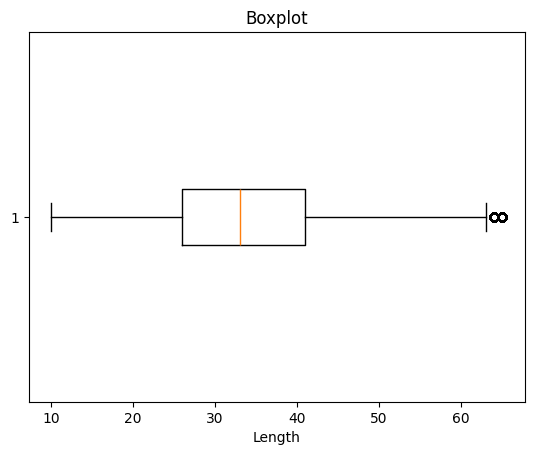

In [ ]:
cell_length=levin_df['Cell_length']
plt.boxplot(cell_length,vert=False)
plt.title('Boxplot')
plt.xlabel('Length')
plt.show()

In [ ]:
levin_df.describe()

Cell_length           DNA1           DNA2         CD45RA  \
count  265626.000000  265626.000000  265626.000000  265626.000000   
mean       34.450547       4.606947       5.198301       0.688129   
std        11.446708       1.312826       1.150353       0.609106   
min        10.000000       2.786488       2.236450      -0.057305   
25%        26.000000       3.700022       4.407818       0.204624   
50%        33.000000       4.022127       4.698410       0.549390   
75%        41.000000       6.353284       6.766243       1.031200   
max        65.000000       7.001489       7.472308       6.691197   

               CD133           CD19           CD22          CD11b  \
count  265626.000000  265626.000000  265626.000000  265626.000000   
mean        0.145960       0.509303       0.397324       0.710307   
std         0.259267       0.857463       0.762127       1.011417   
min        -0.058081      -0.058089      -0.057342      -0.058236   
25%        -0.022935      -0.018838      -0.020689      -0.000295   
50%         0.025353       0.075210       0.058790       0.257923   
75%         0.224300       0.548395       0.386484       0.923512   
max         5.527494       4.990085       5.160477       5.260789   

                 CD4            CD8  ...           CD61          CD117  \
count  265626.000000  265626.000000  ...  265626.000000  265626.000000   
mean        0.367596       0.565223  ...       0.344456       0.131199   
std         0.517377       1.003699  ...       0.724139       0.313208   
min        -0.057751      -0.058003  ...      -0.057642      -0.057668   
25%        -0.012590      -0.017322  ...      -0.012853      -0.023957   
50%         0.131218       0.073632  ...       0.095691      -0.000410   
75%         0.578098       0.486422  ...       0.415791       0.154738   
max         6.581762       4.693694  ...       7.748497       5.502125   

               CD49d         HLA-DR           CD64           CD41  \
count  265626.000000  265626.000000  265626.000000  265626.000000   
mean        0.794941       1.521804       0.551514       0.261755   
std         0.627619       1.694209       0.888740       0.617066   
min        -0.058064      -0.057974      -0.058199      -0.058244   
25%         0.283015       0.057709      -0.010582      -0.020166   
50%         0.677213       0.611332       0.122493       0.052229   
75%         1.190791       2.888237       0.604138       0.305593   
max         5.153438       7.052507       4.517843       7.718288   

           Viability          label     individual       
count  265626.000000  104184.000000  265626.000000  0.0  
mean        0.570038       8.116102       1.279622  NaN  
std         0.589739       2.457486       0.448815  NaN  
min        -0.057979       1.000000       1.000000  NaN  
25%         0.065523       7.000000       1.000000  NaN  
50%         0.398230       8.000000       1.000000  NaN  
75%         0.931059      10.000000       2.000000  NaN  
max         2.433031      14.000000       2.000000  NaN  

[8 rows x 39 columns]

In [ ]:
# Class label distribution
class_distribution = levin_df['label'].value_counts()
print("Class Label Distribution:")
print(class_distribution)


Class Label Distribution:
label
7.0     26366
10.0    21099
8.0     20108
9.0     16520
13.0     6135
2.0      3905
4.0      3295
3.0      2248
11.0     1238
1.0      1207
6.0       916
14.0      513
12.0      330
5.0       304
Name: count, dtype: int64


In [ ]:
# Correlation matrix
correlation_matrix = levin_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
Cell_length     1.000000  0.416422  0.431904  0.111395 -0.059958 -0.005860   
DNA1            0.416422  1.000000  0.984877  0.100073 -0.285512 -0.025968   
DNA2            0.431904  0.984877  1.000000  0.104683 -0.277264 -0.026992   
CD45RA          0.111395  0.100073  0.104683  1.000000  0.092387  0.361184   
CD133          -0.059958 -0.285512 -0.277264  0.092387  1.000000  0.094540   
CD19           -0.005860 -0.025968 -0.026992  0.361184  0.094540  1.000000   
CD22           -0.012261 -0.063191 -0.063372  0.359608  0.112904  0.754304   
CD11b           0.008625 -0.000547  0.004136 -0.119703  0.016589 -0.172355   
CD4             0.033516 -0.005343  0.000558 -0.108921 -0.013967 -0.240936   
CD8             0.022216  0.002273  0.006534  0.079825  0.089389 -0.193807   
CD34           -0.014858 -0.050997 -0.051362 -0.059609  0.134702  0.012203   
Flt3           -0.005297 -0.177852 -0.169852

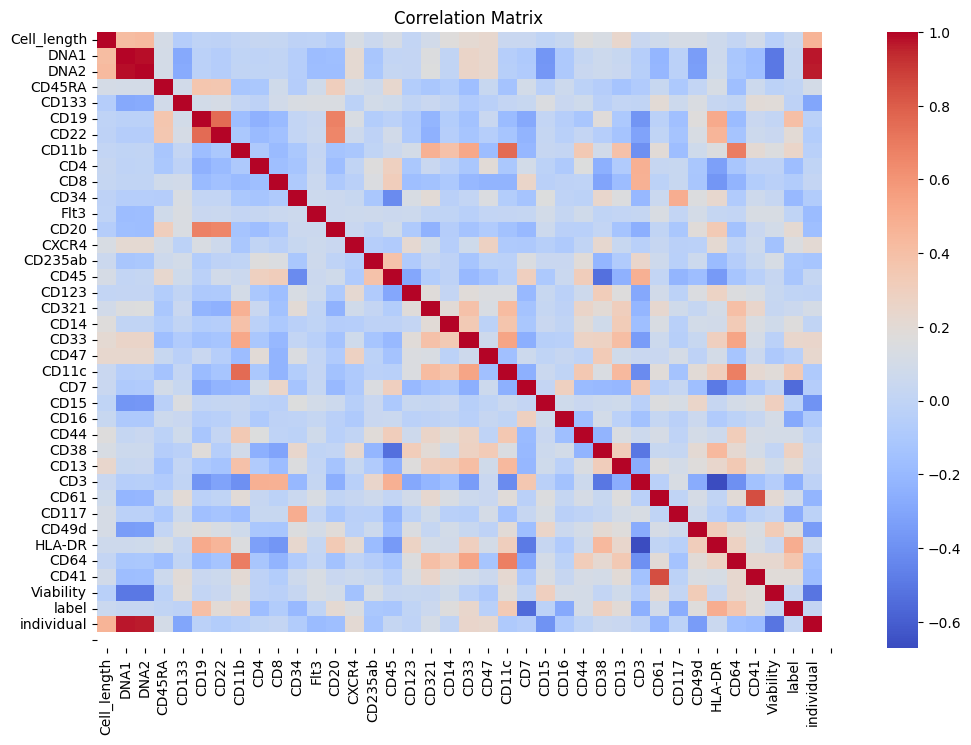

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')  # Set annot=False
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Calculate the range of each feature
feature_ranges = levin_df.describe().loc[['min', 'max']]

# Iterate over each feature and print the range
print("Range of Each Feature:")
for feature in feature_ranges.columns:
    min_value = feature_ranges[feature]['min']
    max_value = feature_ranges[feature]['max']
    print(f"{feature}: Range = [{min_value}, {max_value}]")

Range of Each Feature:
Cell_length: Range = [10.0, 65.0]
DNA1: Range = [2.786487579345703, 7.001489162445068]
DNA2: Range = [2.2364501953125, 7.472308158874512]
CD45RA: Range = [-0.0573051534593105, 6.691196918487549]
CD133: Range = [-0.0580806508660316, 5.527494430541992]
CD19: Range = [-0.0580888837575912, 4.990085124969482]
CD22: Range = [-0.0573421716690063, 5.160477161407471]
CD11b: Range = [-0.0582357197999954, 5.260789394378662]
CD4: Range = [-0.0577511452138423, 6.581761837005615]
CD8: Range = [-0.0580032616853714, 4.693694114685059]
CD34: Range = [-0.0580080933868885, 5.147996425628662]
Flt3: Range = [-0.0578843541443347, 7.11732292175293]
CD20: Range = [-0.0581324510276317, 6.051411151885986]
CXCR4: Range = [-0.0570424646139144, 5.696674346923828]
CD235ab: Range = [-0.0576120018959045, 6.646698951721191]
CD45: Range = [2.040243148803711, 7.238076210021973]
CD123: Range = [-0.0580033026635646, 6.640626430511475]
CD321: Range = [-0.0535515248775482, 6.867388248443604]
CD14: Ran

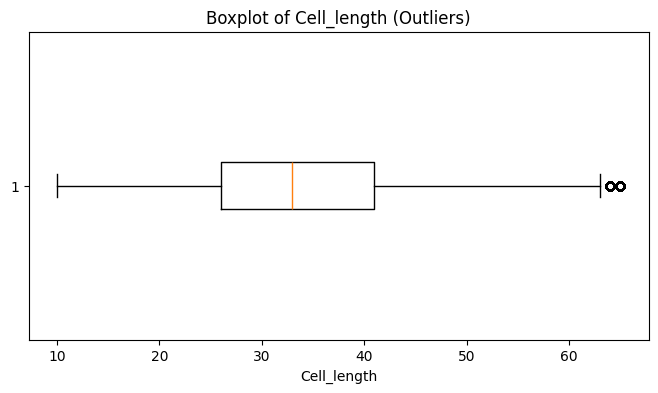

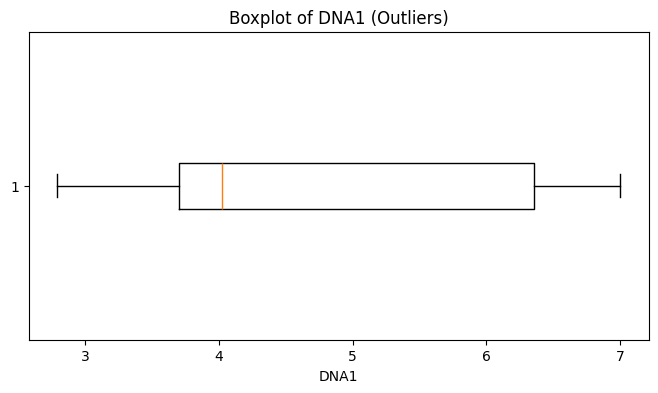

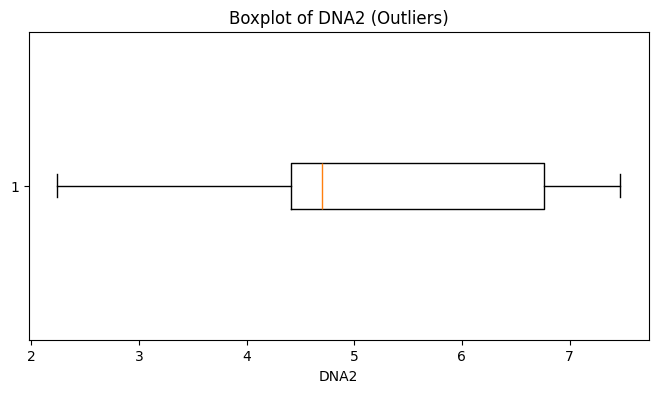

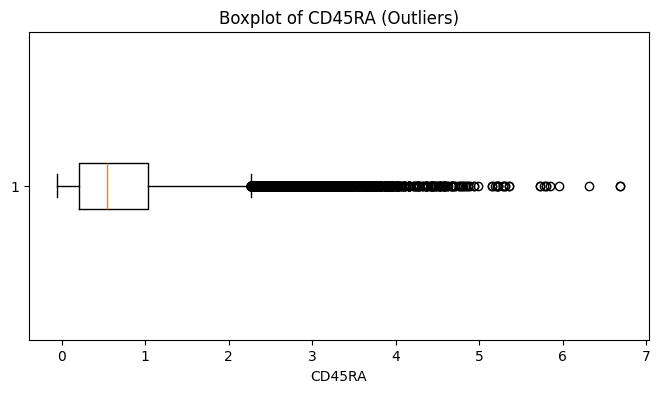

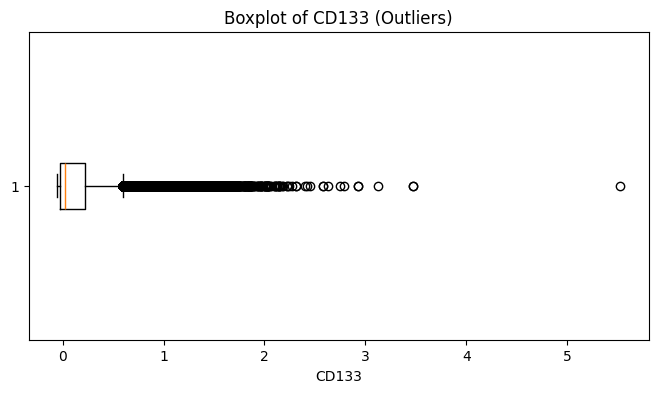

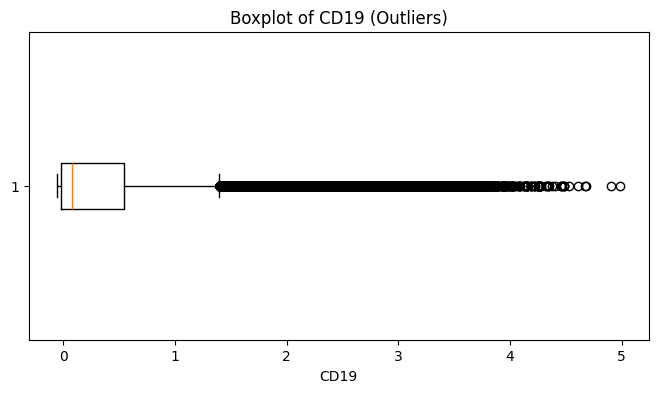

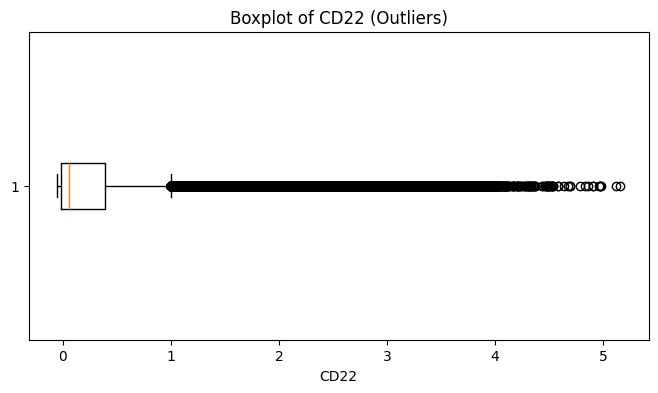

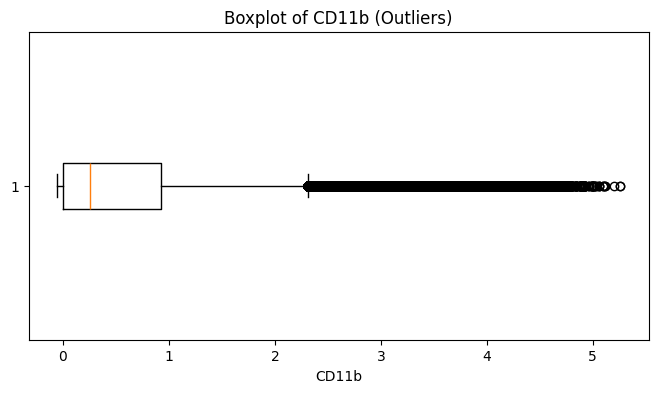

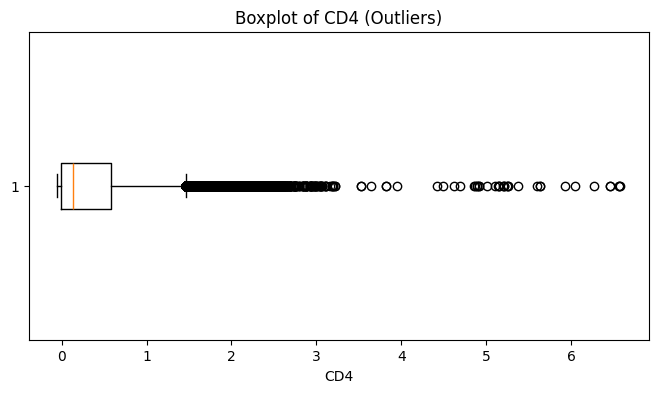

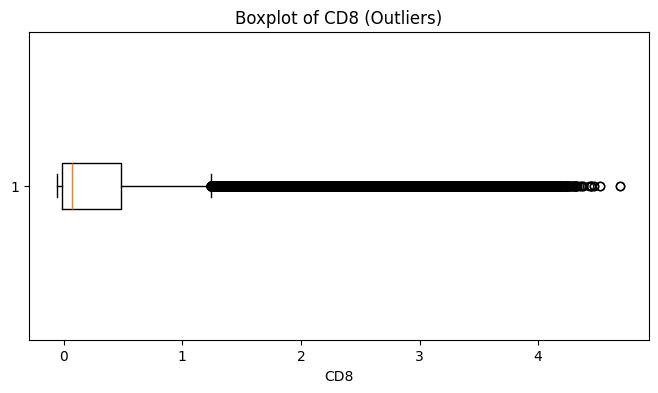

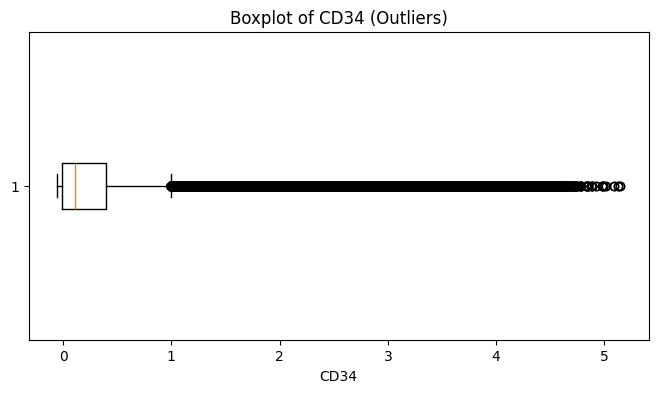

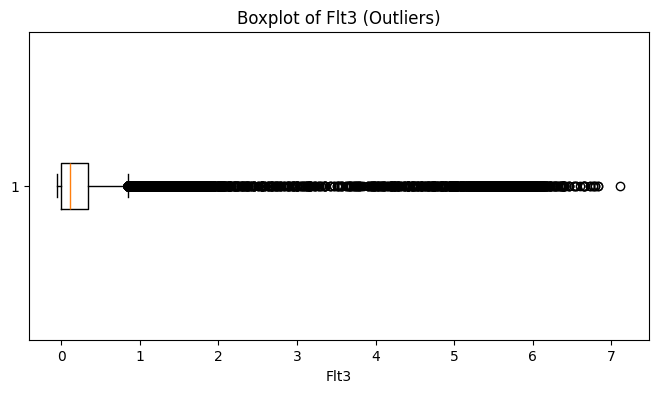

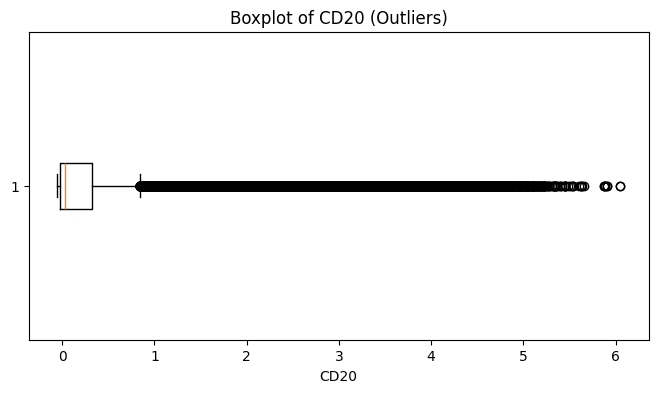

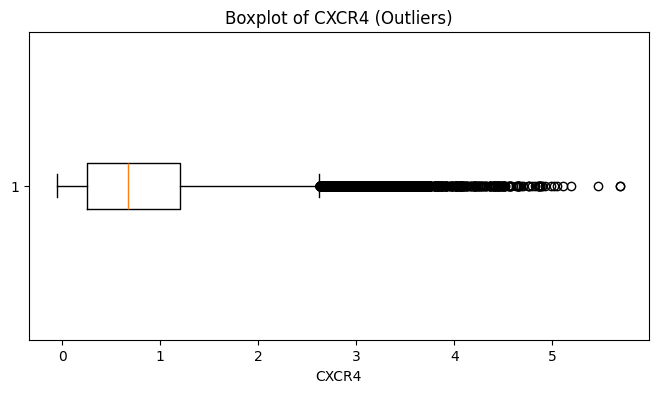

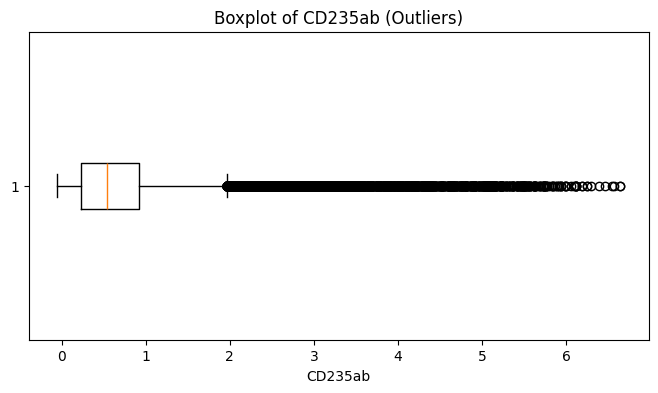

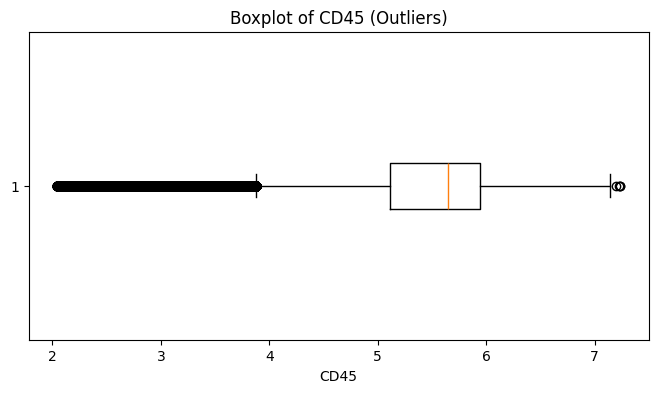

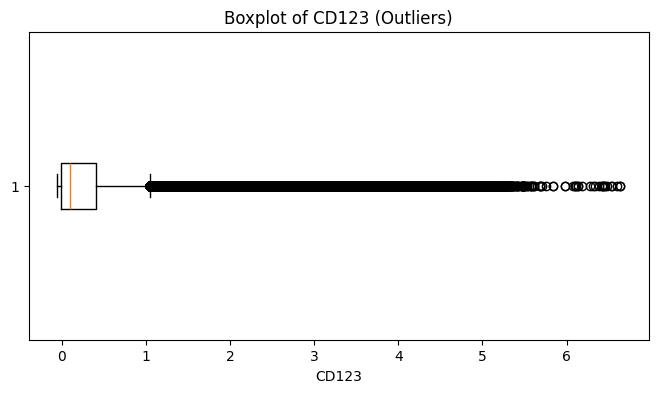

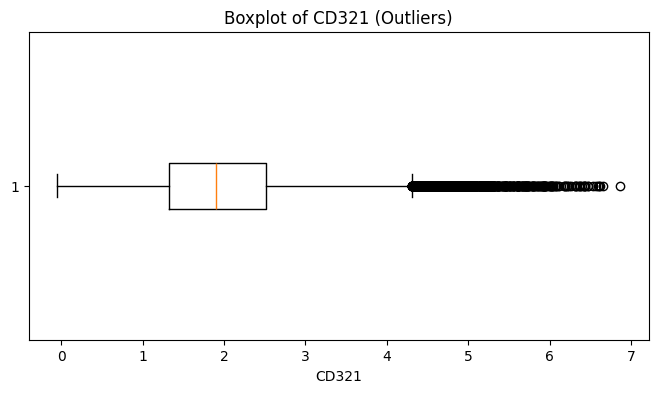

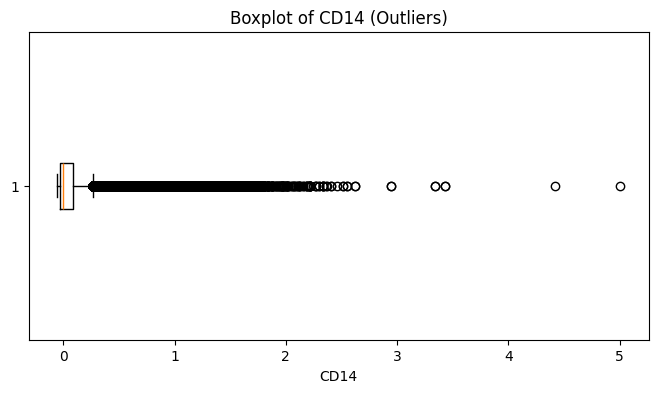

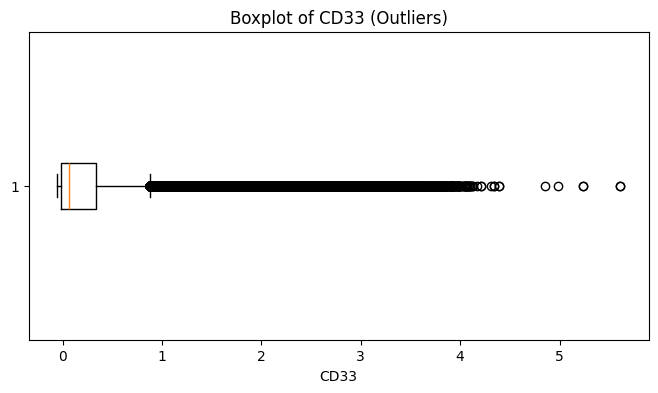

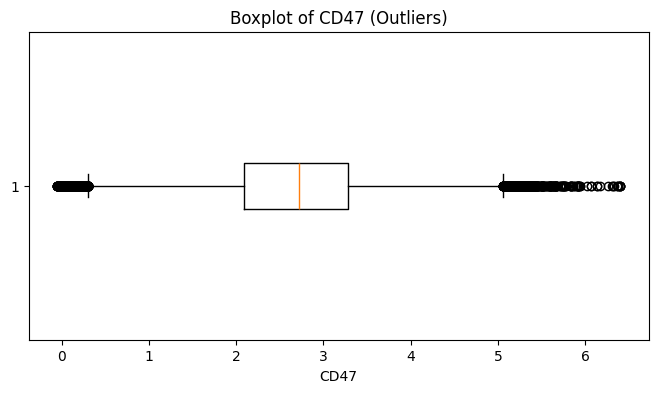

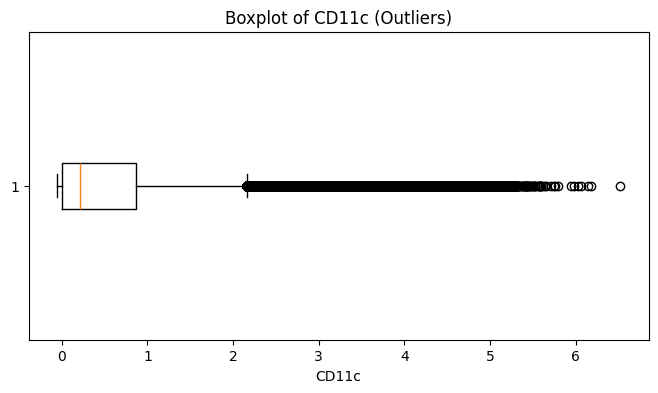

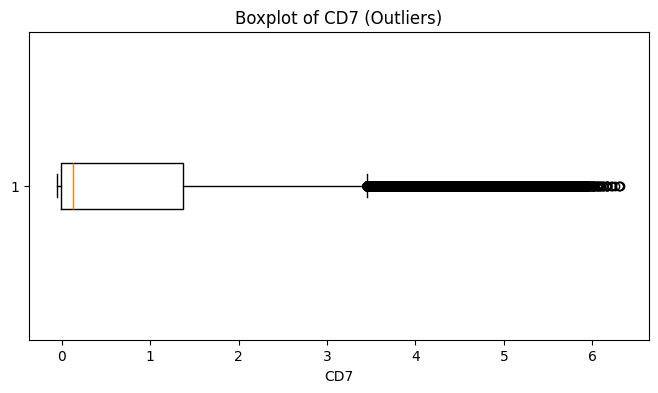

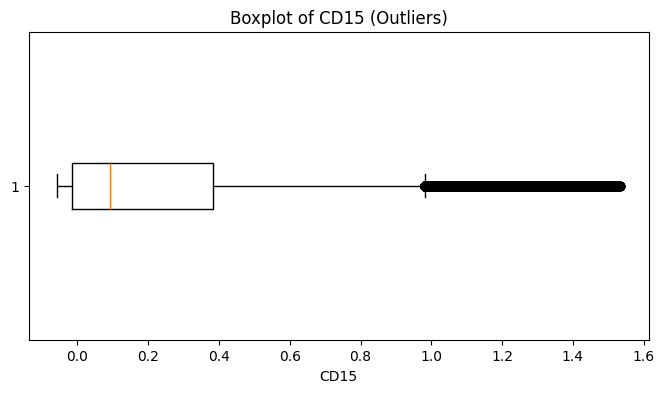

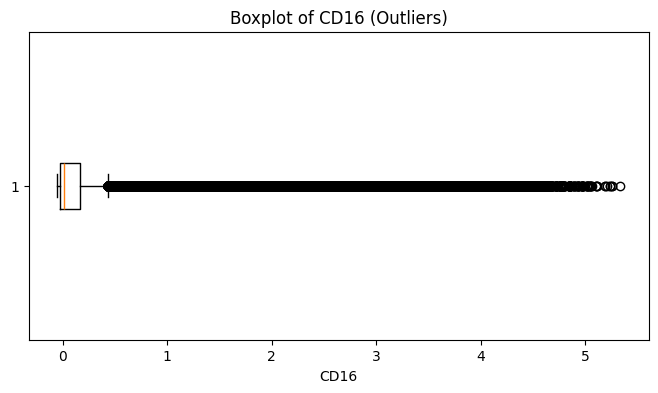

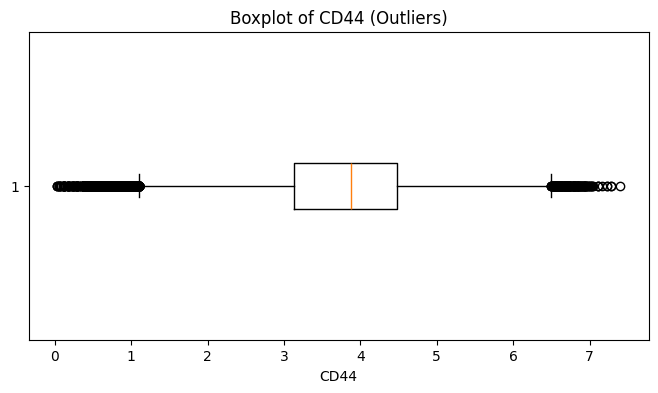

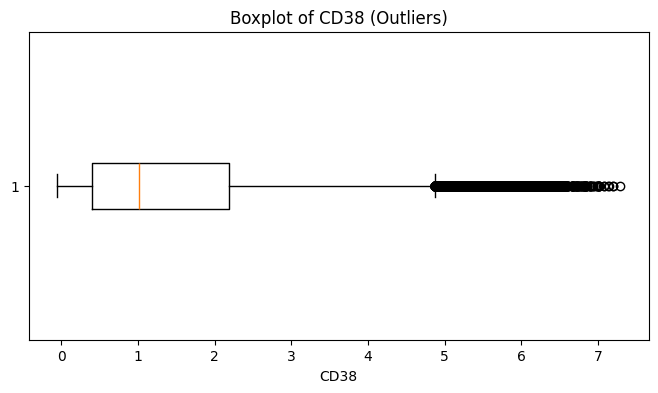

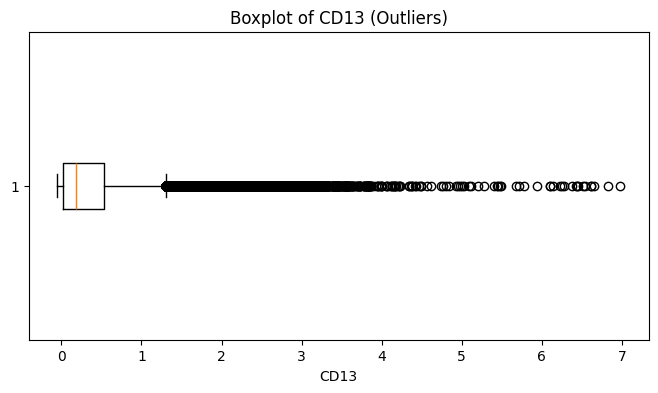

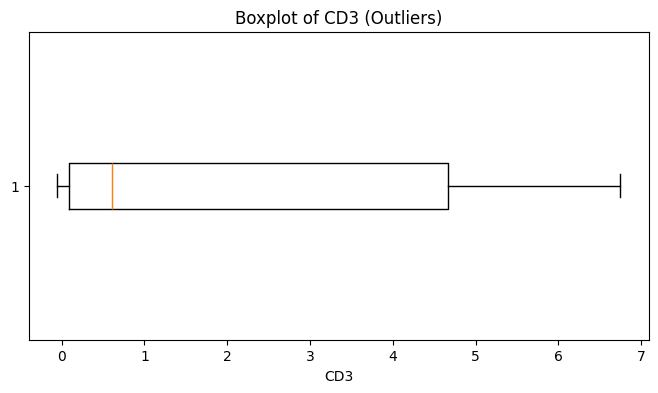

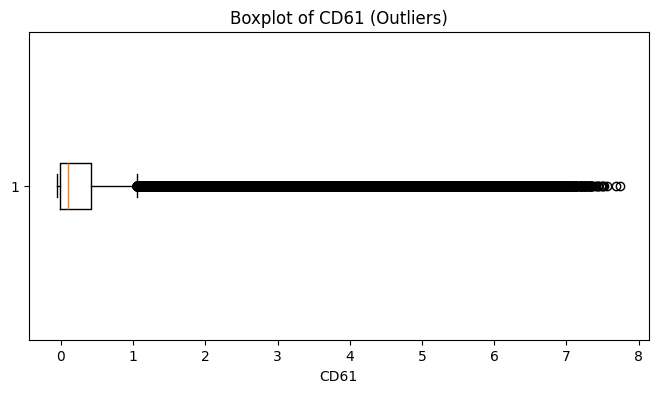

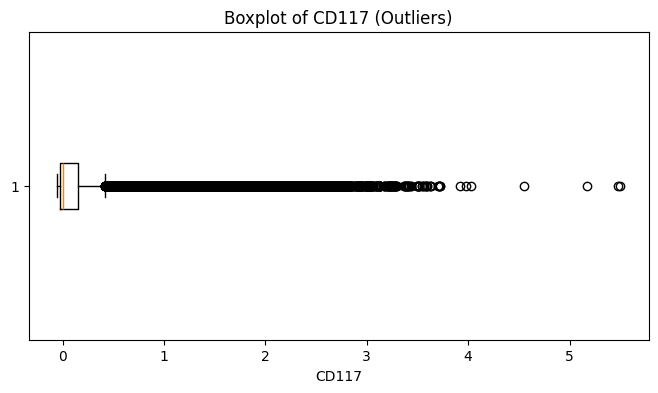

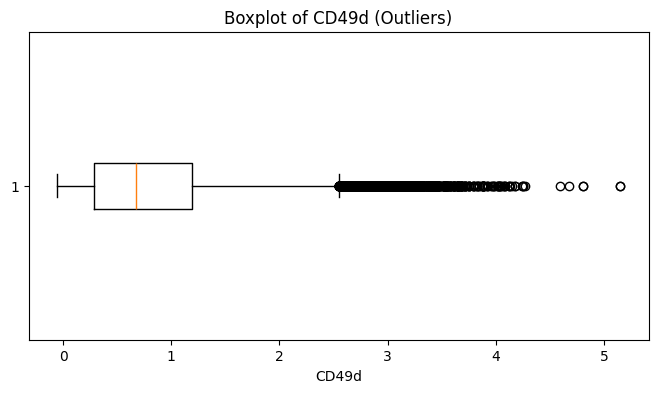

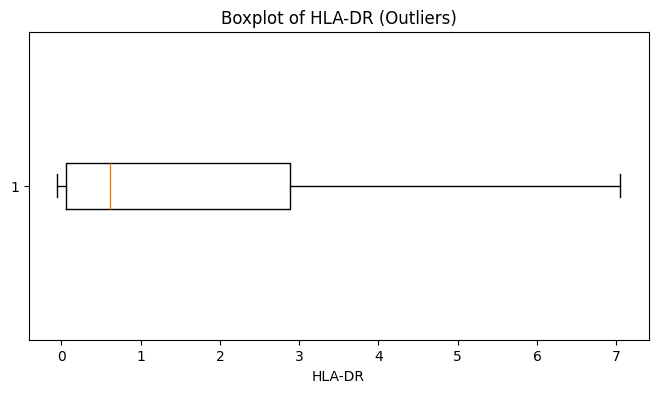

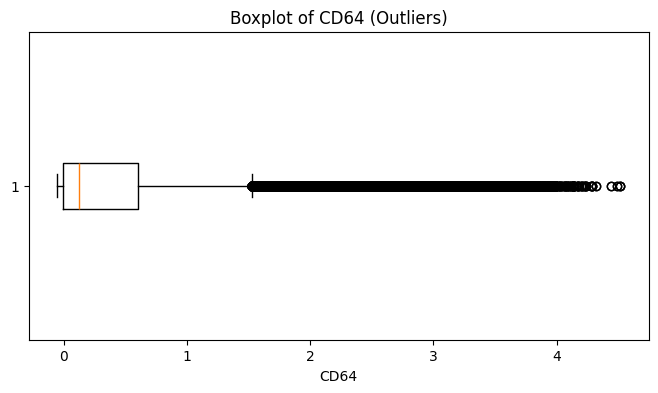

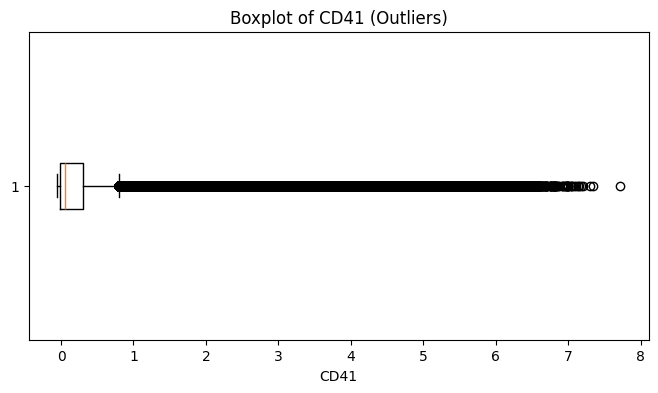

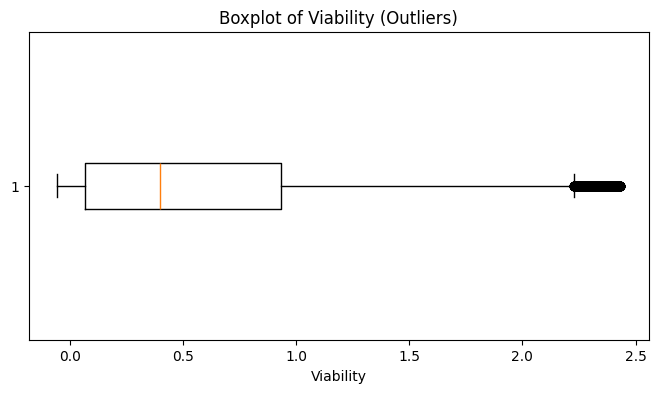

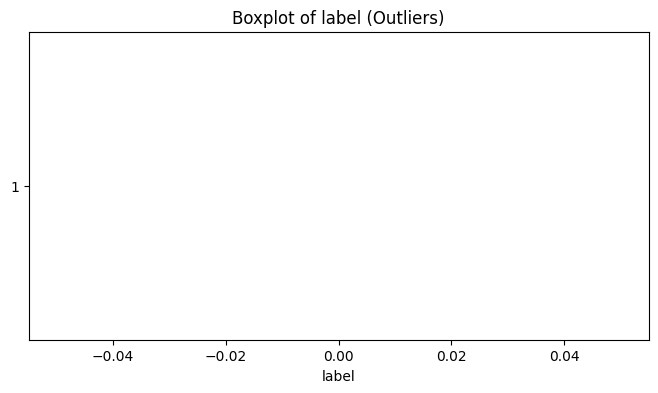

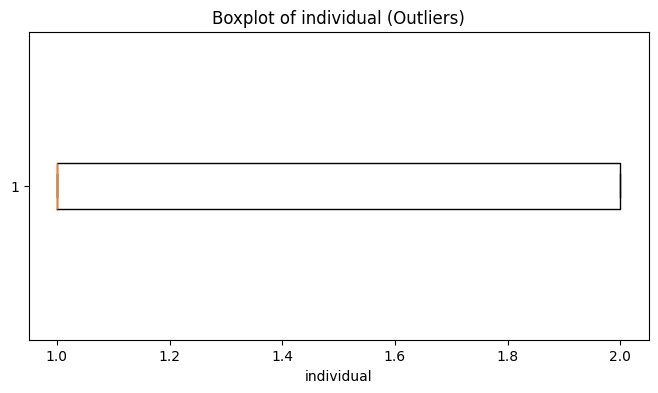

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

columns_to_plot = [
    'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22',
    'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab',
    'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7',
    'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d',
    'HLA-DR', 'CD64', 'CD41', 'Viability', 'label', 'individual'
]

for feature in columns_to_plot:
    if feature in levin_df.columns:
        plt.figure(figsize=(8, 4))
        plt.boxplot(levin_df[feature], vert=False)
        plt.title(f'Boxplot of {feature} (Outliers)')
        plt.xlabel(feature)
        plt.show()  # Show the plot
    else:
        print(f"Column '{feature}' not found in DataFrame.")


                  Column   Kurtosis                   Category
Cell_length  Cell_length   2.834033  Platykurtic (light tails)
DNA1                DNA1   1.994062  Platykurtic (light tails)
DNA2                DNA2   1.975046  Platykurtic (light tails)
CD45RA            CD45RA   4.964254  Leptokurtic (heavy tails)
CD133              CD133   9.190030  Leptokurtic (heavy tails)
CD19                CD19   4.590867  Leptokurtic (heavy tails)
CD22                CD22   7.500190  Leptokurtic (heavy tails)
CD11b              CD11b   4.964563  Leptokurtic (heavy tails)
CD4                  CD4   5.844286  Leptokurtic (heavy tails)
CD8                  CD8   4.745753  Leptokurtic (heavy tails)
CD34                CD34  16.596353  Leptokurtic (heavy tails)
Flt3                Flt3  85.583337  Leptokurtic (heavy tails)
CD20                CD20  10.435410  Leptokurtic (heavy tails)
CXCR4              CXCR4   3.936297  Leptokurtic (heavy tails)
CD235ab          CD235ab  13.440534  Leptokurtic (heavy

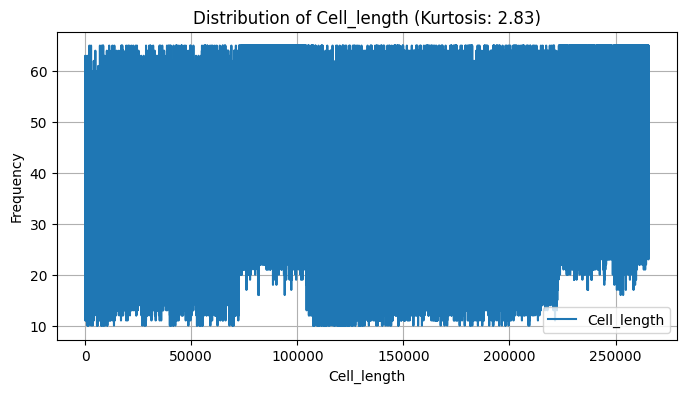

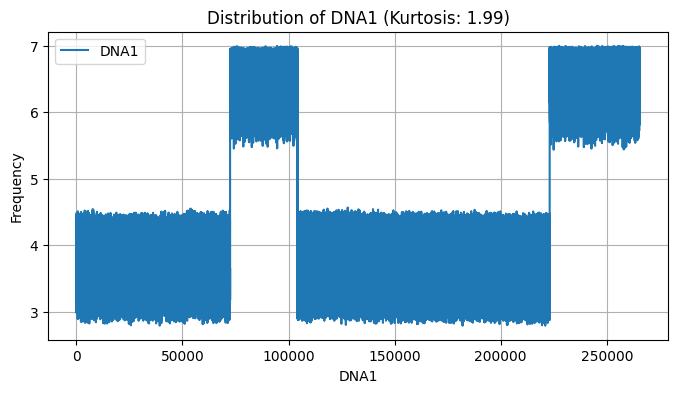

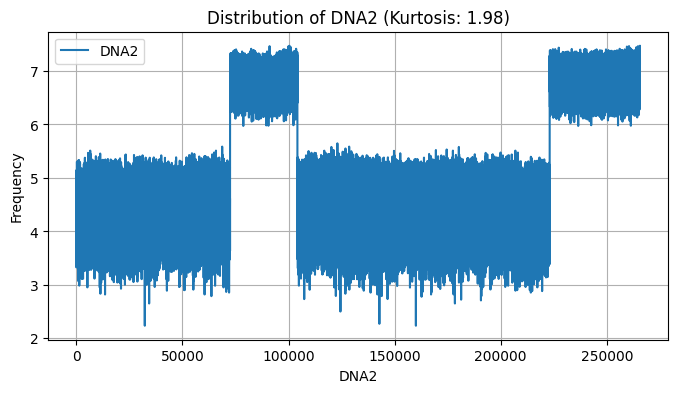

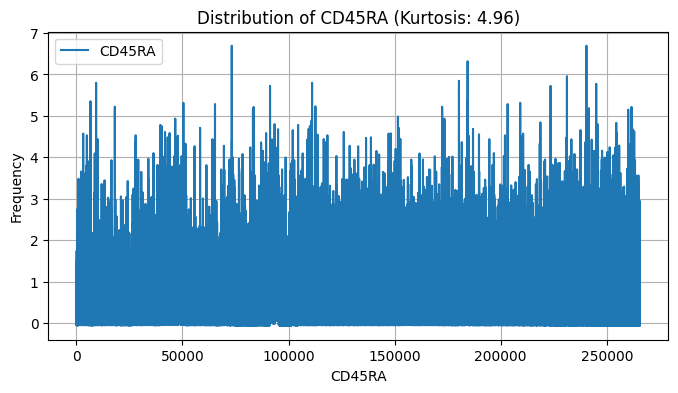

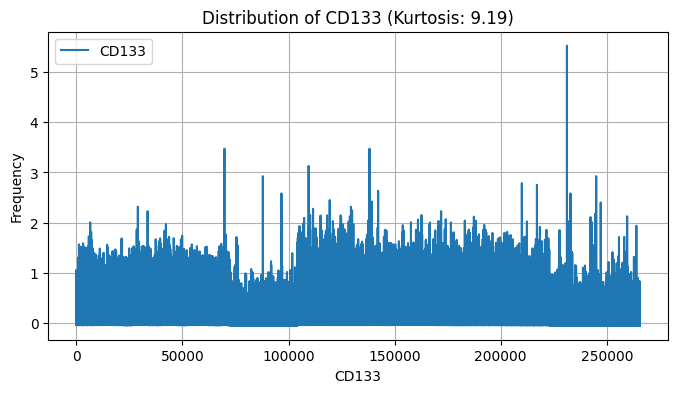

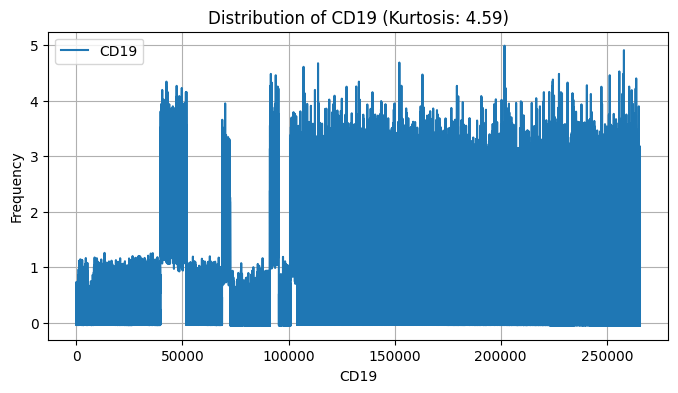

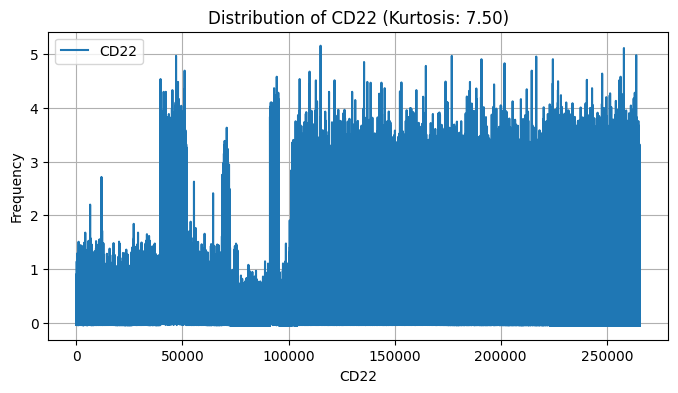

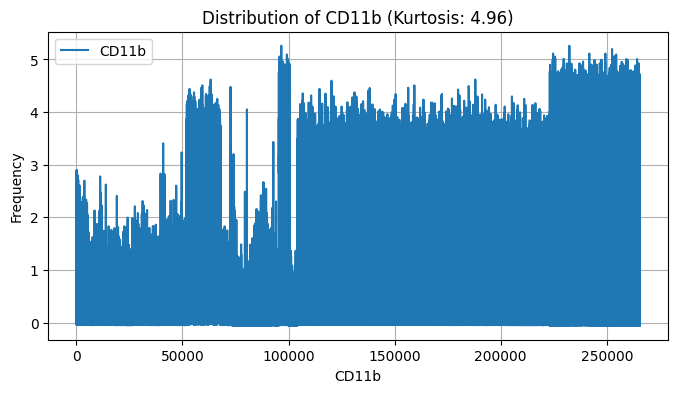

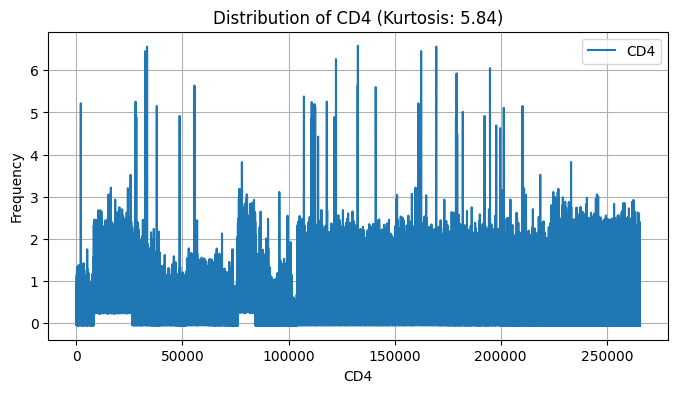

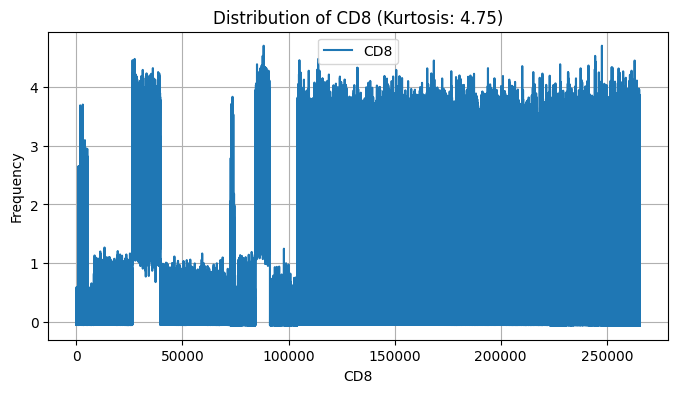

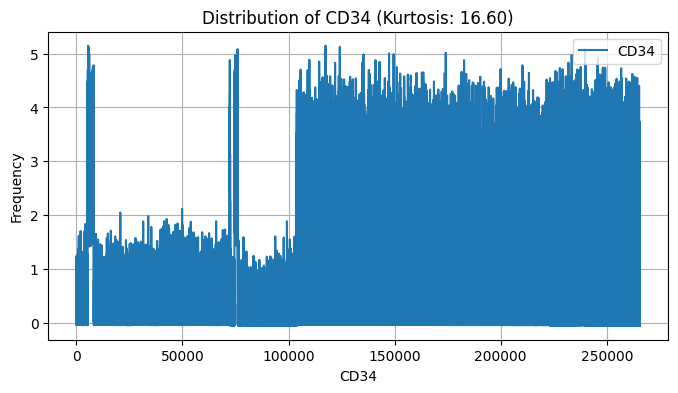

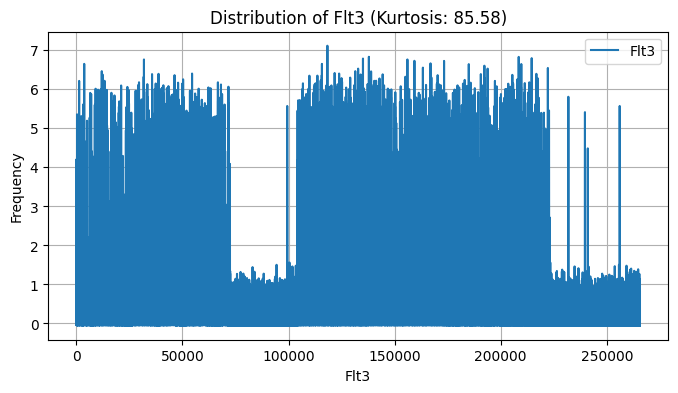

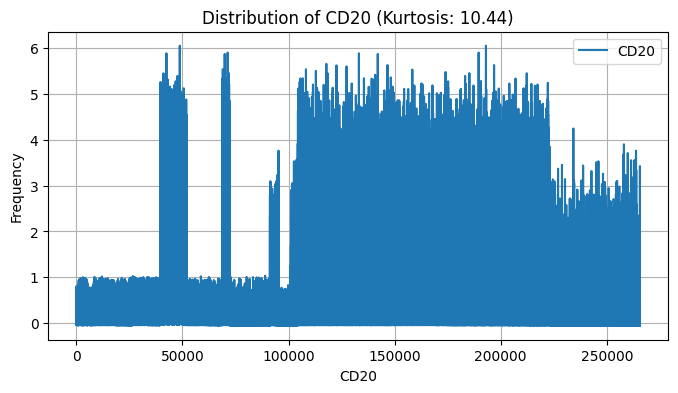

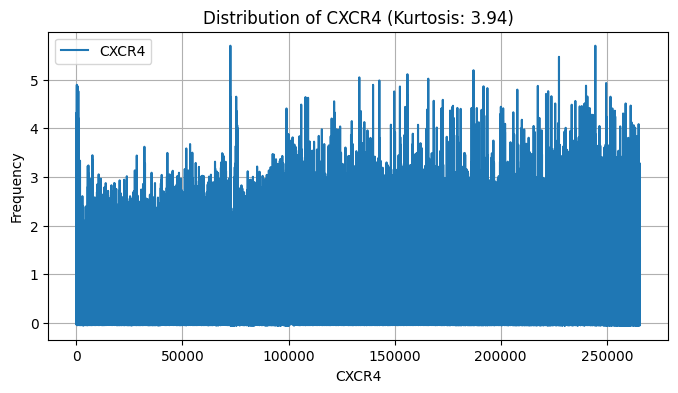

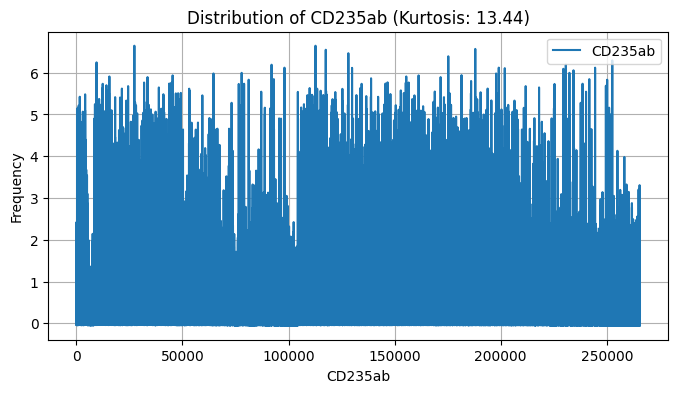

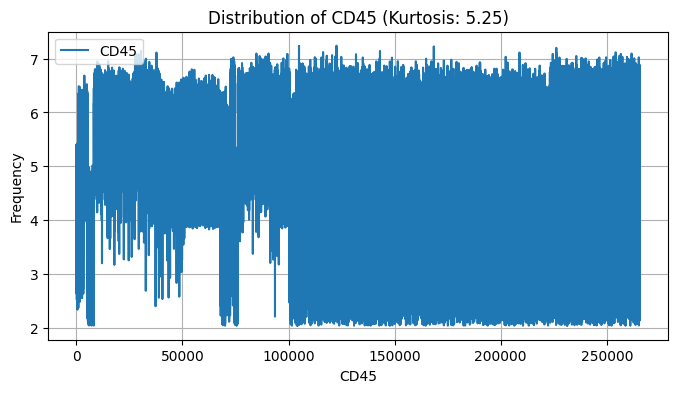

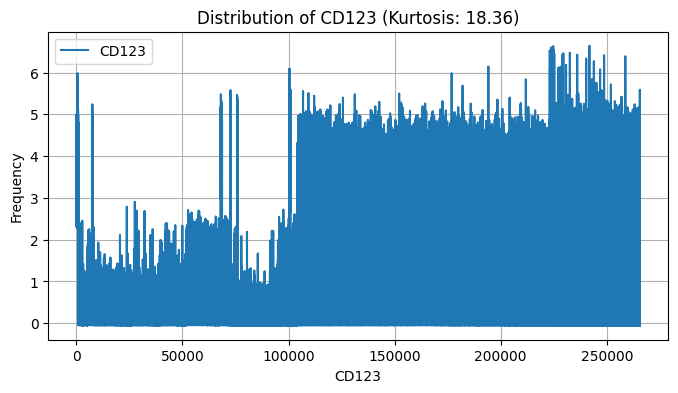

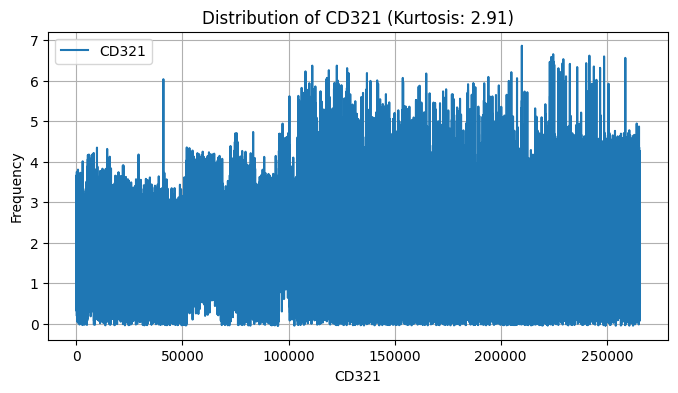

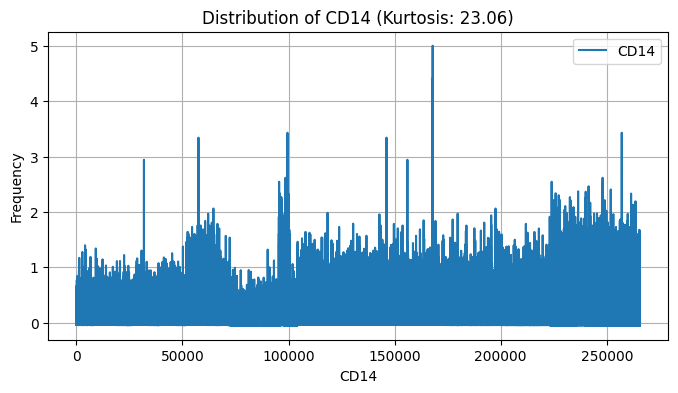

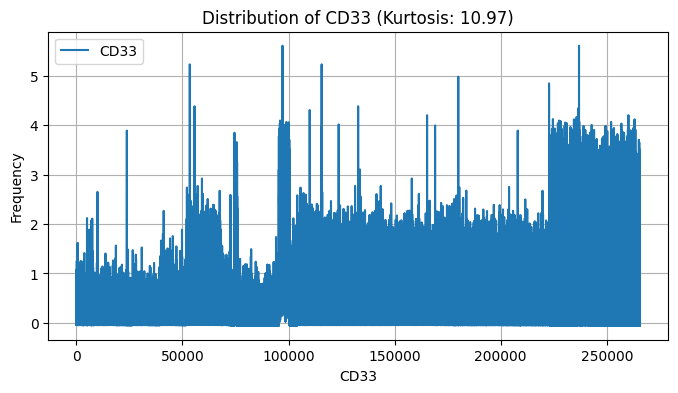

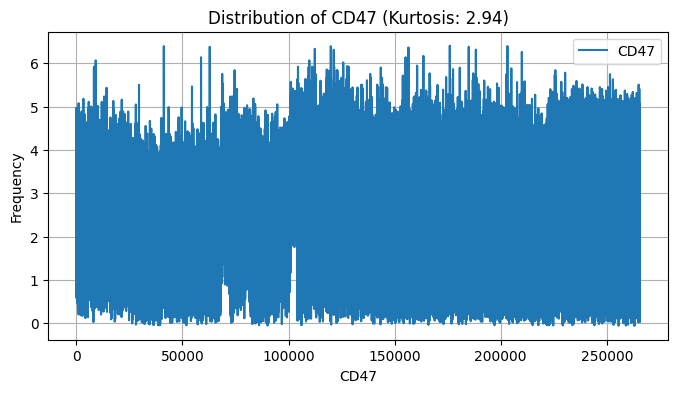

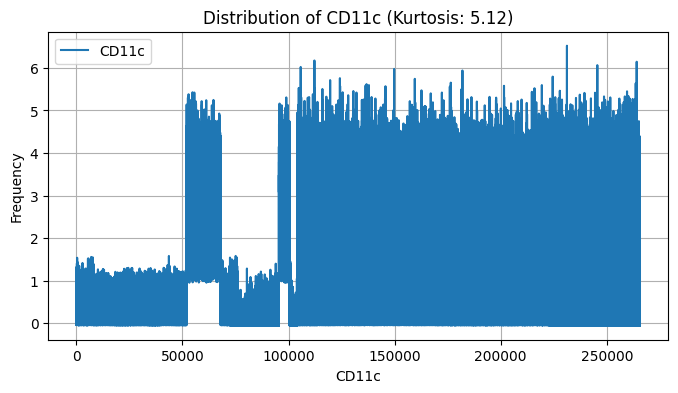

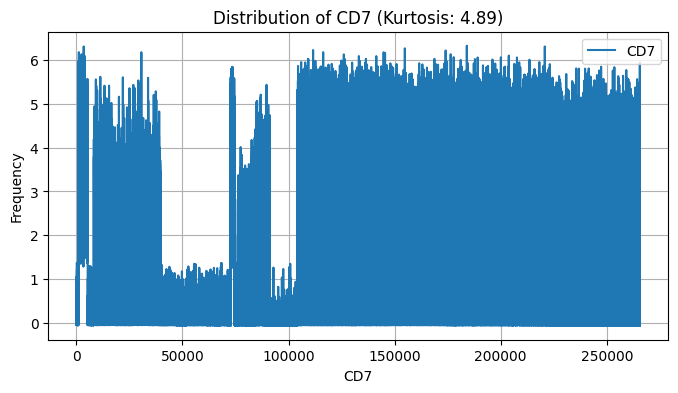

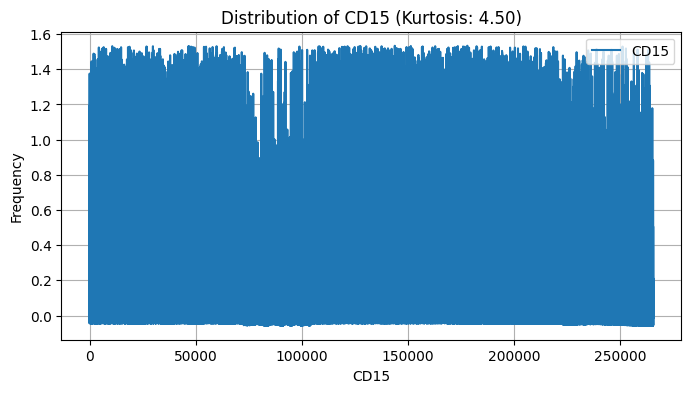

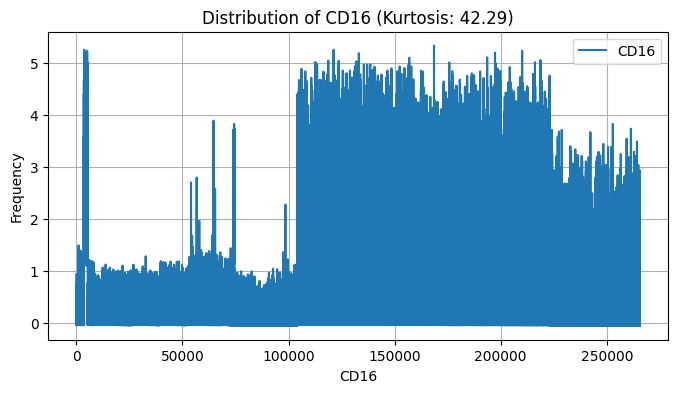

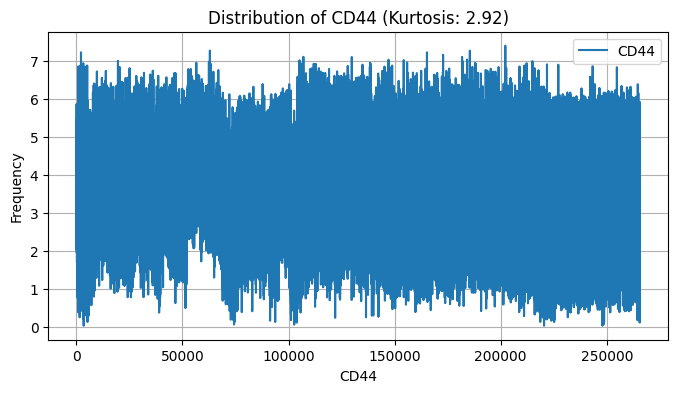

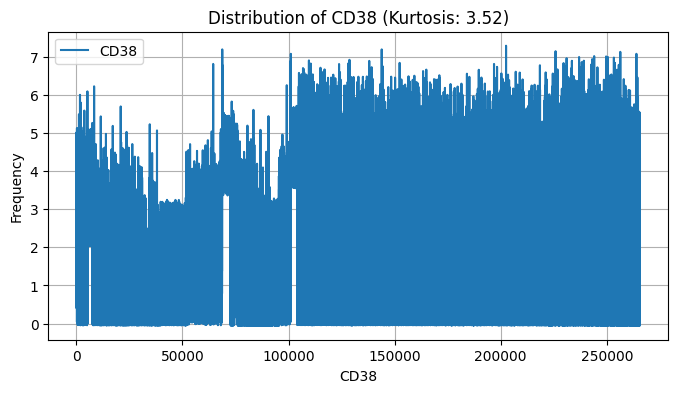

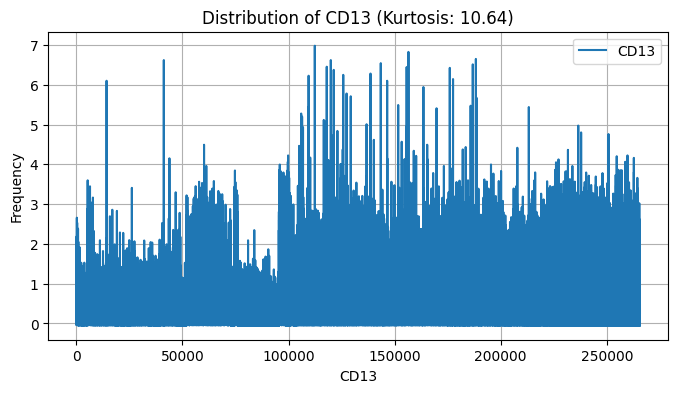

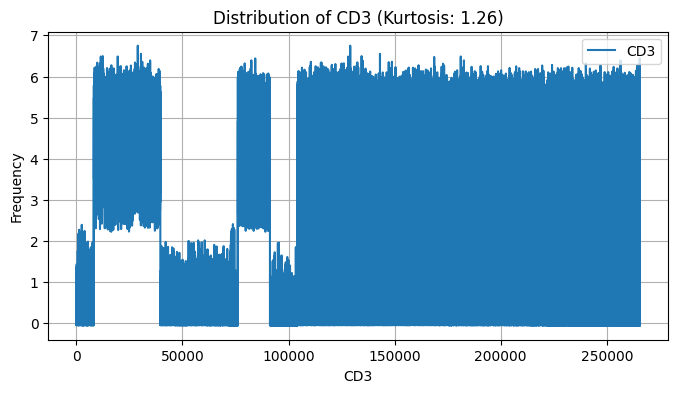

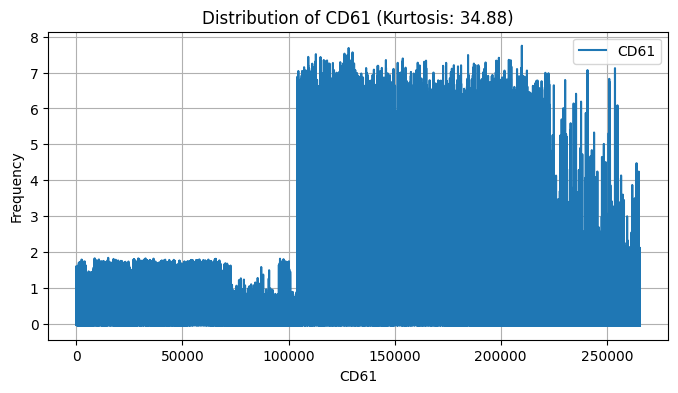

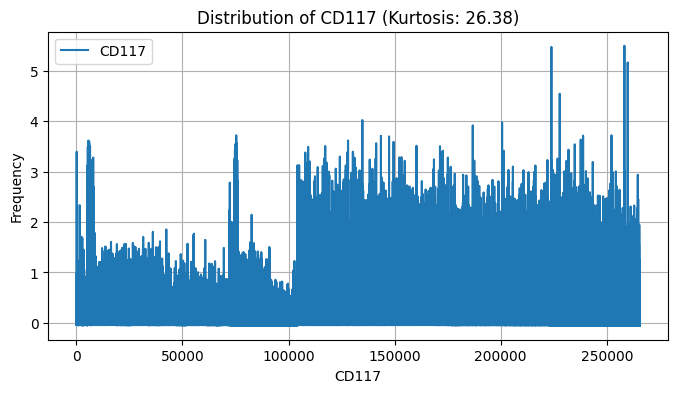

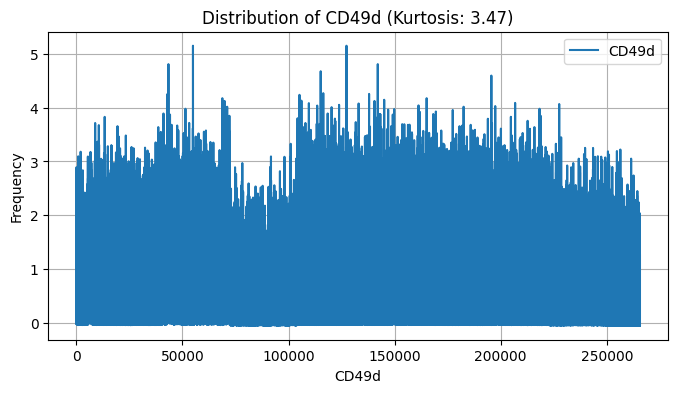

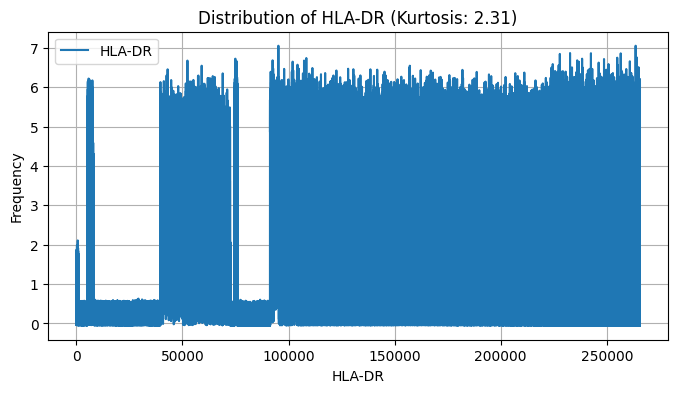

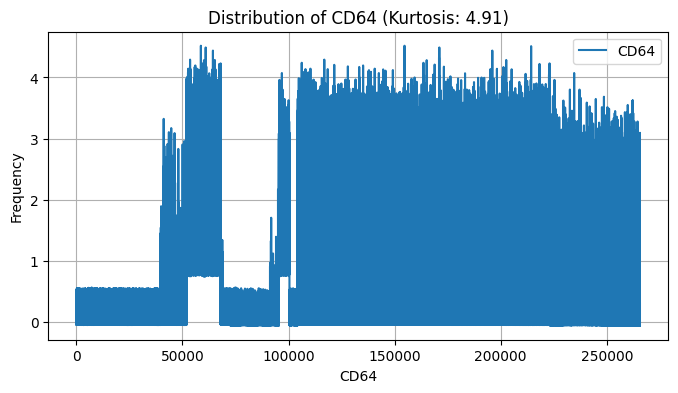

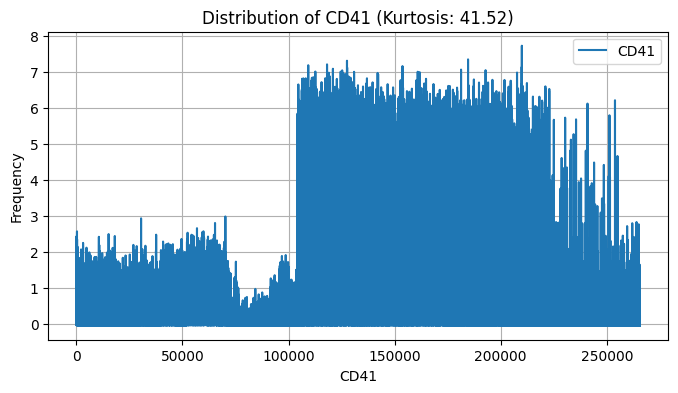

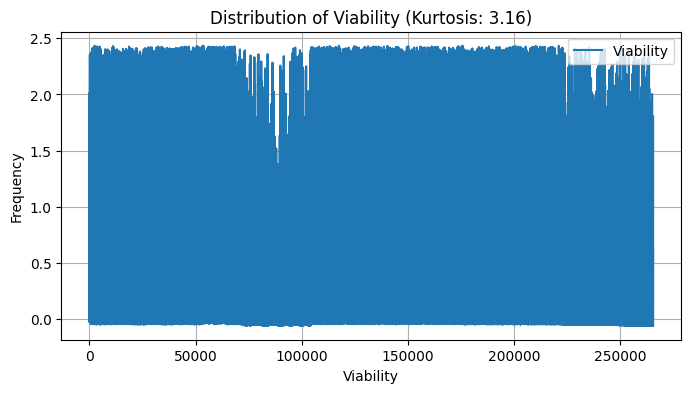

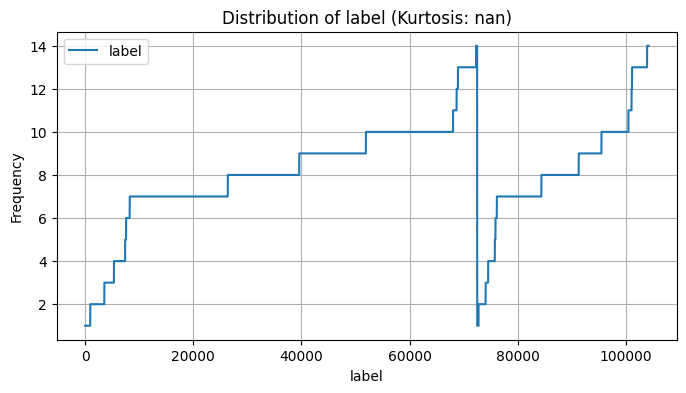

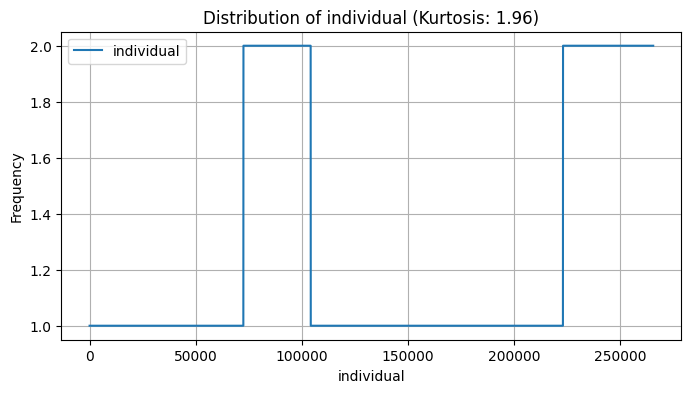

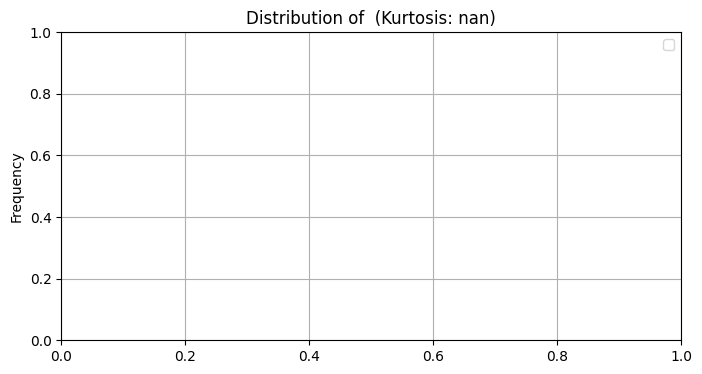

In [ ]:
from scipy.stats import kurtosis

# Calculate kurtosis for each column
kurtosis_values = levin_df.apply(kurtosis, fisher=False)  # Fisher=False gives Pearson kurtosis (normal kurtosis = 3)

# Create a DataFrame with kurtosis values
kurtosis_df = pd.DataFrame({'Column': levin_df.columns, 'Kurtosis': kurtosis_values})

# Categorize the kurtosis values (Leptokurtic, Mesokurtic, Platykurtic)
def categorize_kurtosis(value):
    if value > 3:
        return 'Leptokurtic (heavy tails)'
    elif value < 3:
        return 'Platykurtic (light tails)'
    else:
        return 'Mesokurtic (normal tails)'

kurtosis_df['Category'] = kurtosis_df['Kurtosis'].apply(categorize_kurtosis)

# Print the kurtosis values and their categories
print(kurtosis_df)

# Line plots for each column
for column in levin_df.columns:
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=levin_df[column].dropna(), label=column)
    plt.title(f'Distribution of {column} (Kurtosis: {kurtosis_df.loc[kurtosis_df["Column"] == column, "Kurtosis"].values[0]:.2f})')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.legend()
    plt.show()


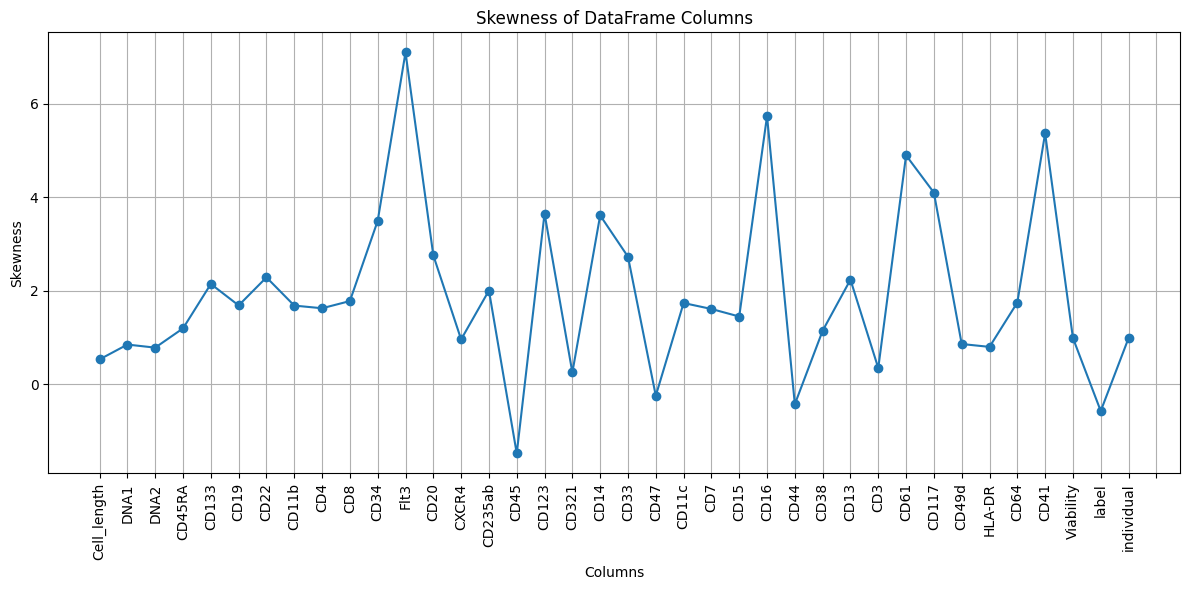

In [ ]:
# 1. Data Type Conversion (Important!)
from scipy.stats import skew
for col in levin_df.columns:
    levin_df[col] = pd.to_numeric(levin_df[col], errors='coerce')

# 2. Calculate Skewness
skewness_values = levin_df.apply(lambda x: skew(x, nan_policy='omit'))

# 3. Create DataFrame for Plotting
skewness_df = pd.DataFrame({'Column': levin_df.columns, 'Skewness': skewness_values})

# 4. Plot Line Graph
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(skewness_df['Column'], skewness_df['Skewness'], marker='o', linestyle='-')
plt.title('Skewness of DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

             Skewness                   Category
Cell_length  0.527837               Right-skewed
DNA1         0.845023               Right-skewed
DNA2         0.779179               Right-skewed
CD45RA       1.191589               Right-skewed
CD133        2.141948               Right-skewed
CD19         1.682603               Right-skewed
CD22         2.283175               Right-skewed
CD11b        1.679099               Right-skewed
CD4          1.622054               Right-skewed
CD8          1.775707               Right-skewed
CD34         3.492430               Right-skewed
Flt3         7.098147               Right-skewed
CD20         2.754693               Right-skewed
CXCR4        0.955336               Right-skewed
CD235ab      2.001474               Right-skewed
CD45        -1.484825                Left-skewed
CD123        3.648884               Right-skewed
CD321        0.247103  Approximately symmetrical
CD14         3.609043               Right-skewed
CD33         2.72497

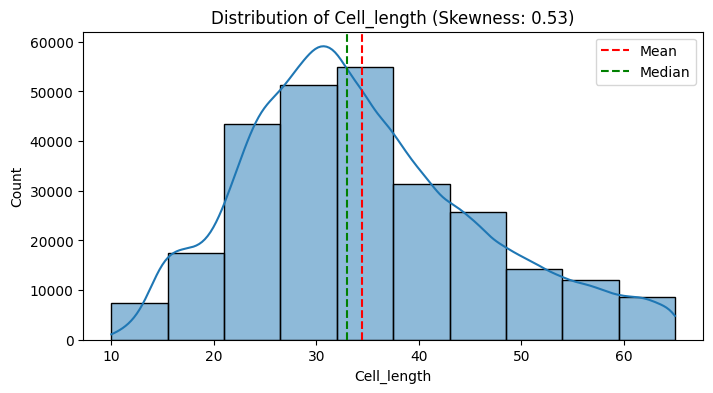

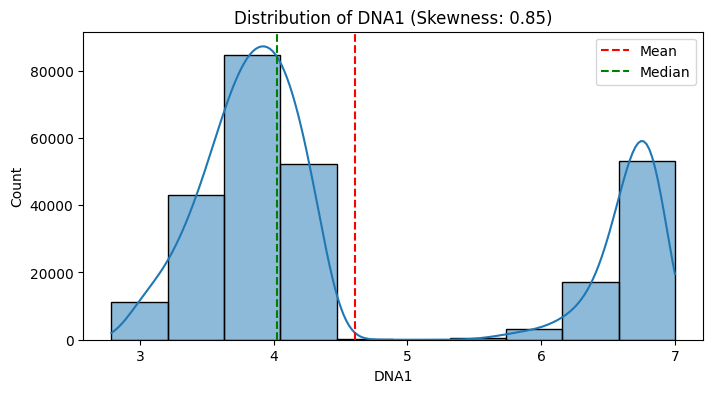

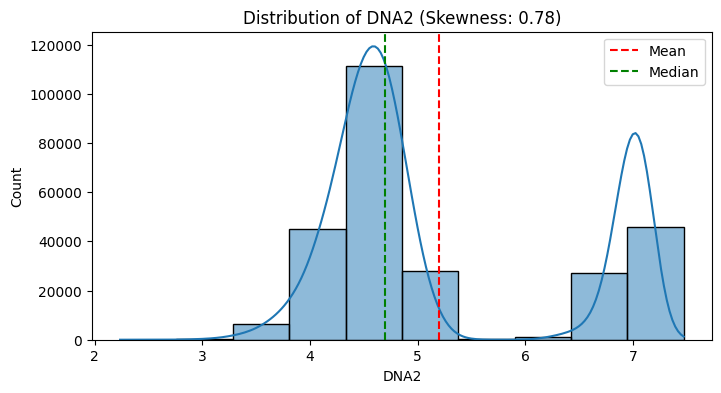

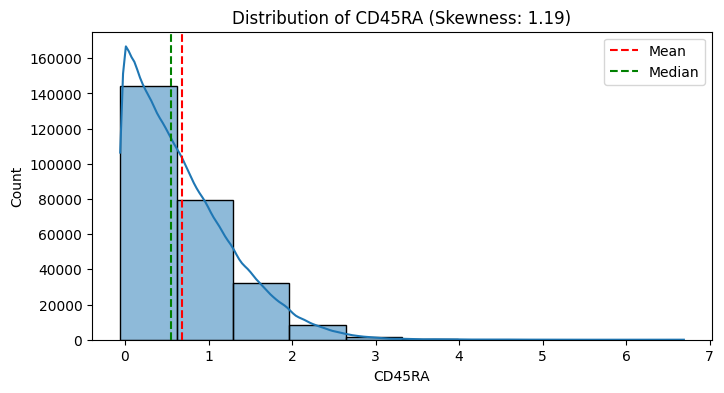

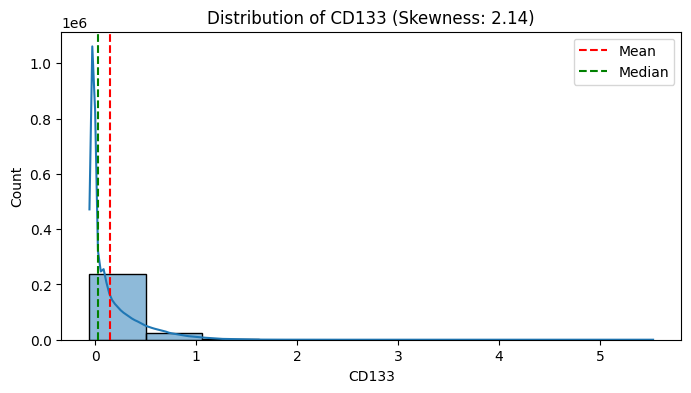

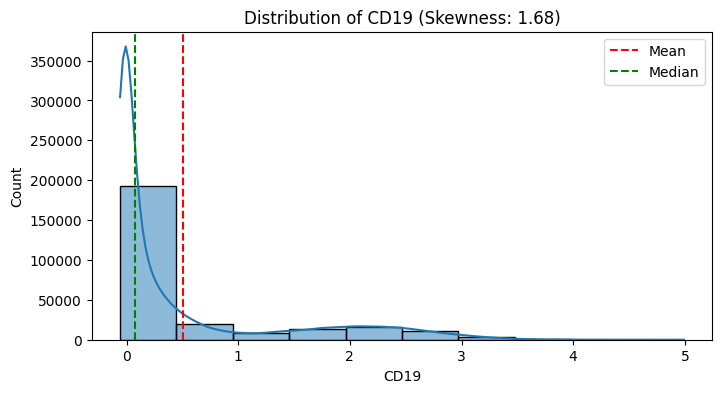

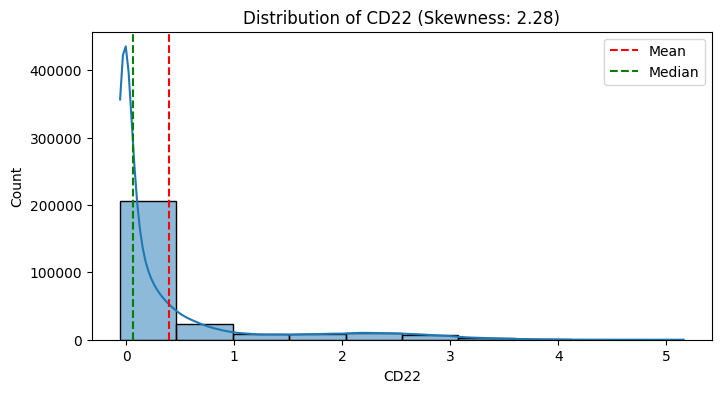

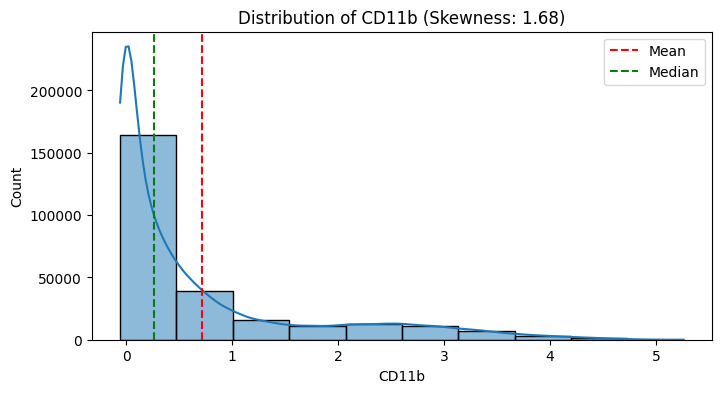

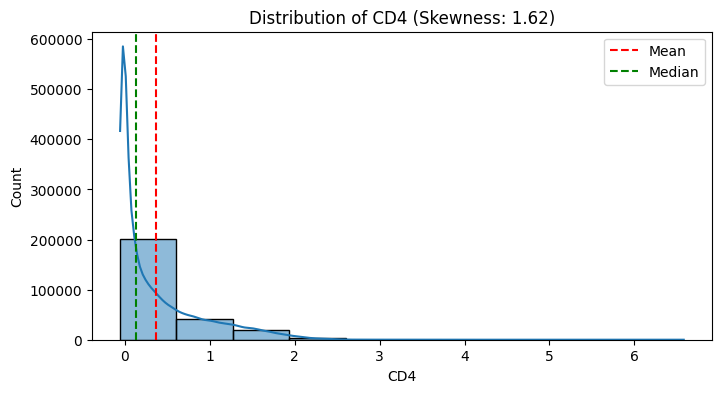

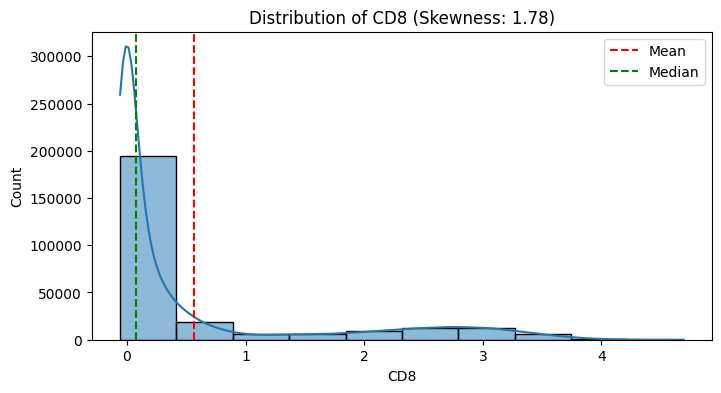

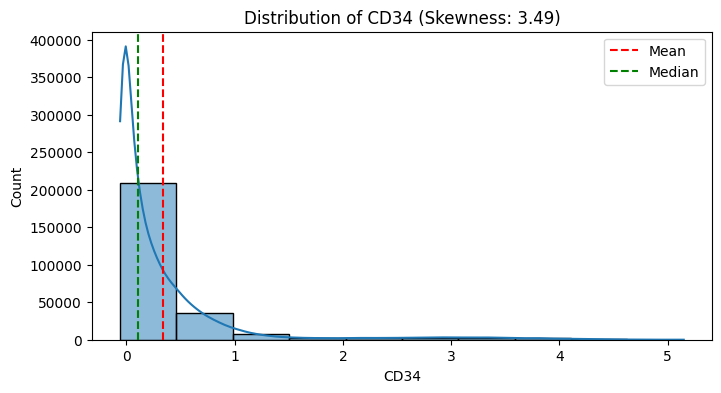

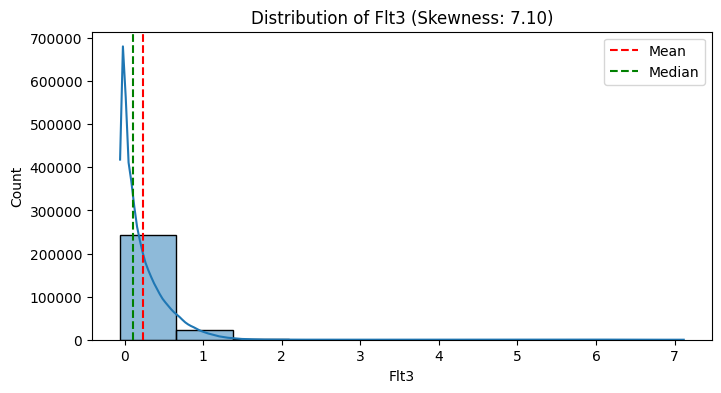

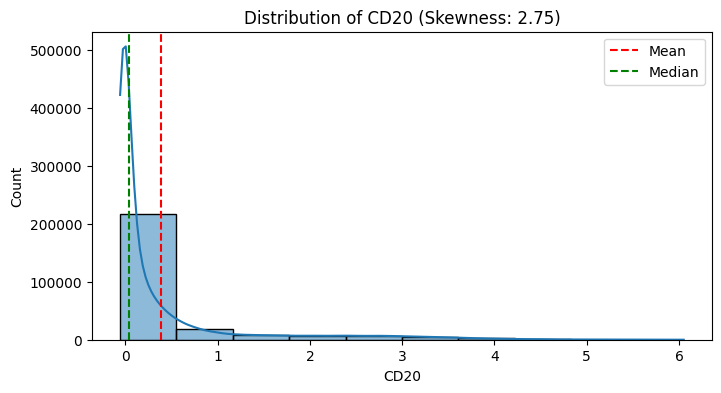

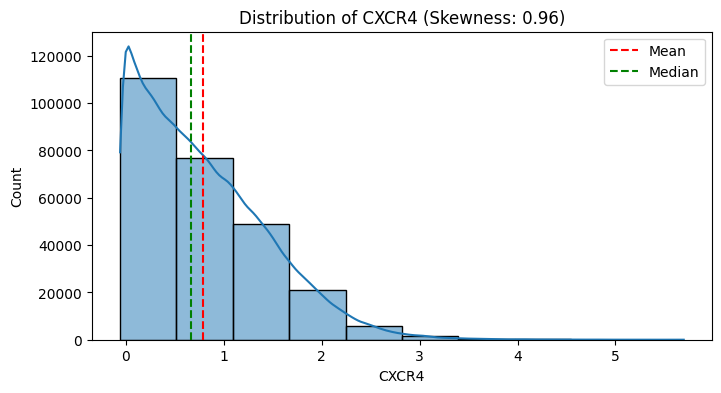

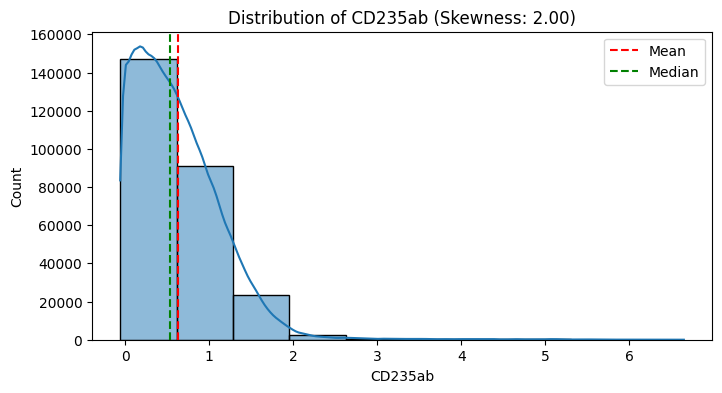

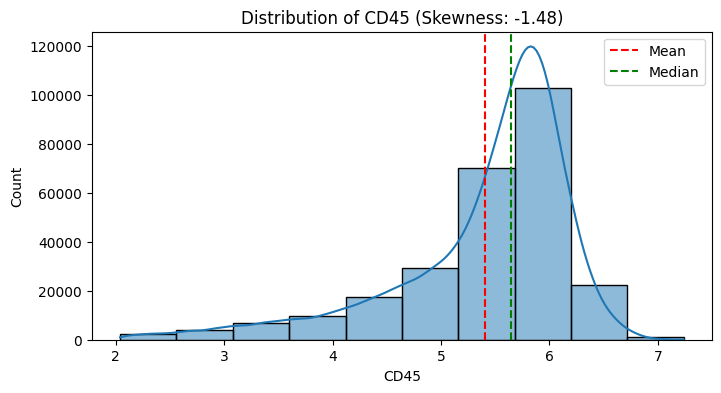

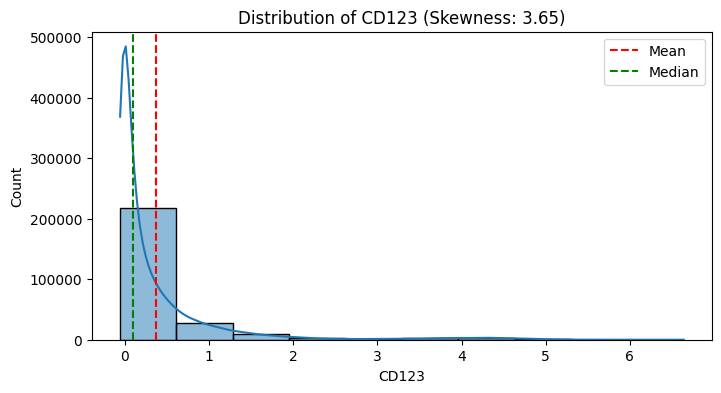

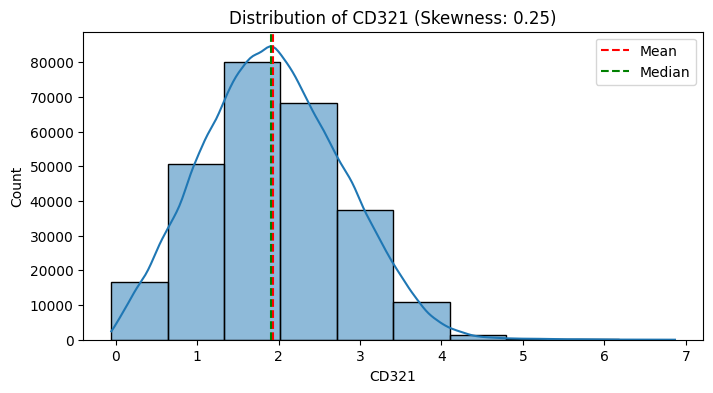

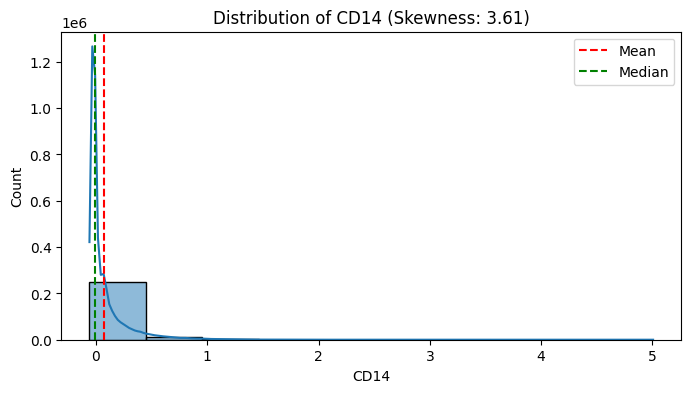

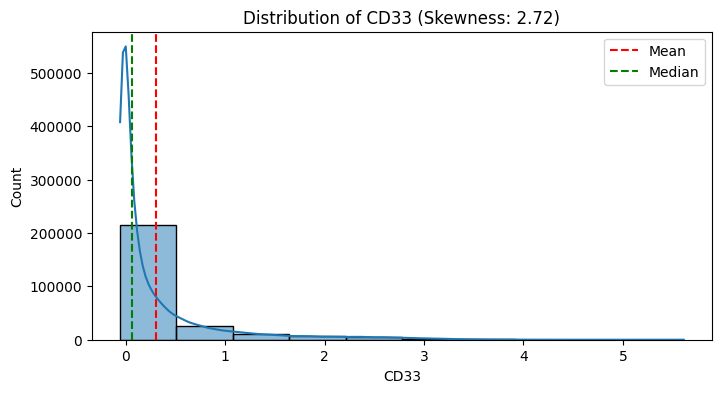

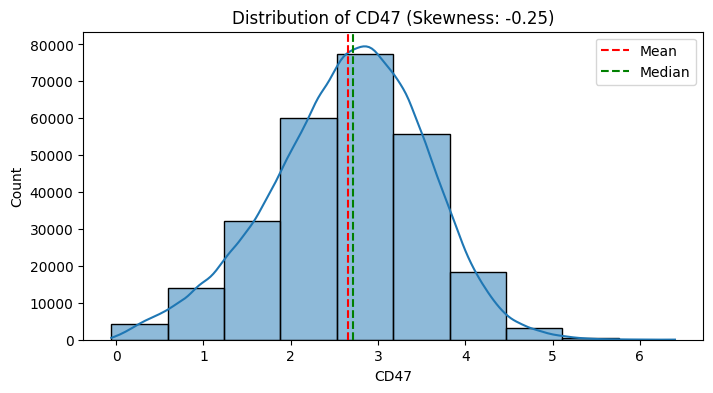

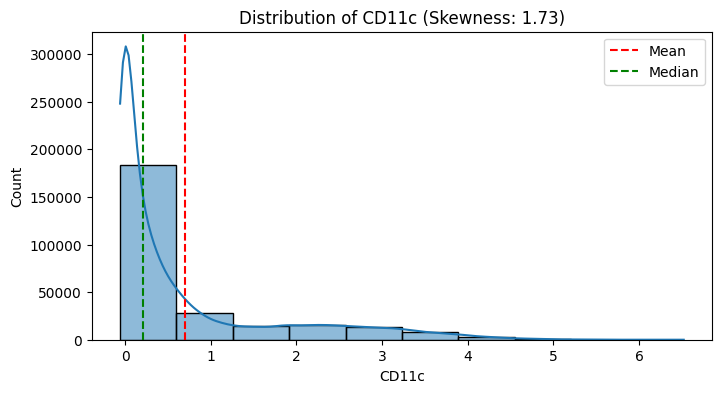

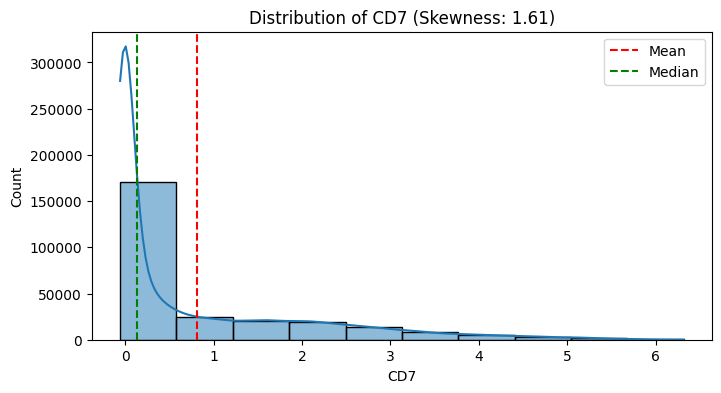

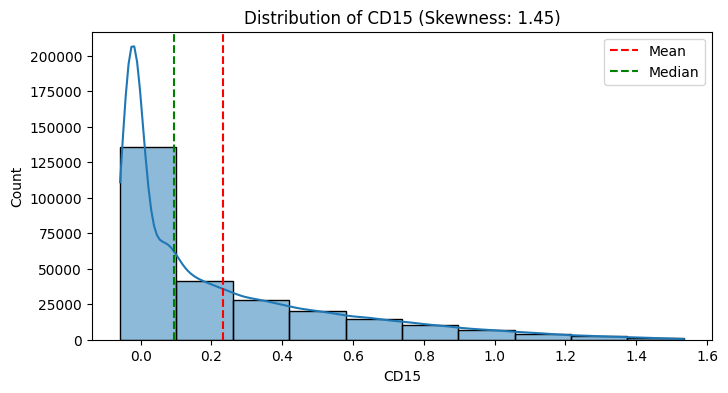

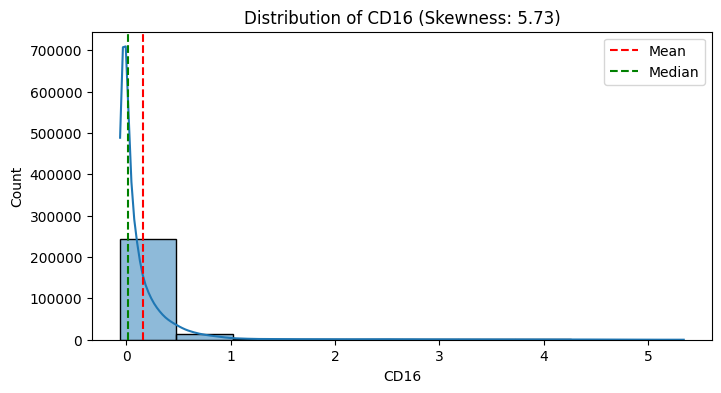

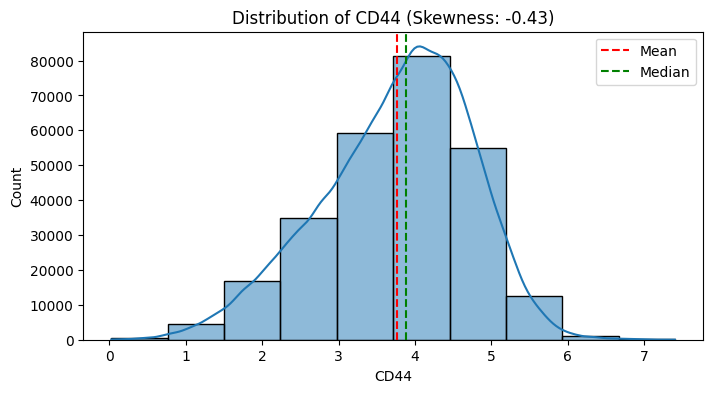

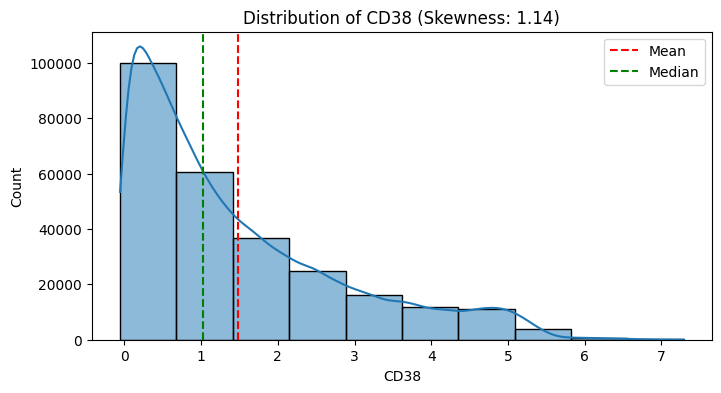

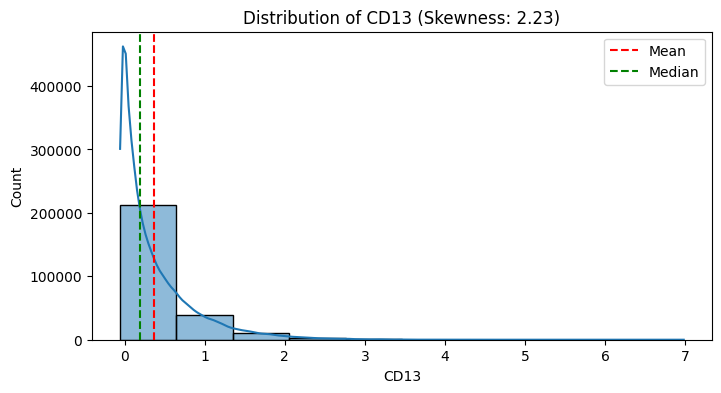

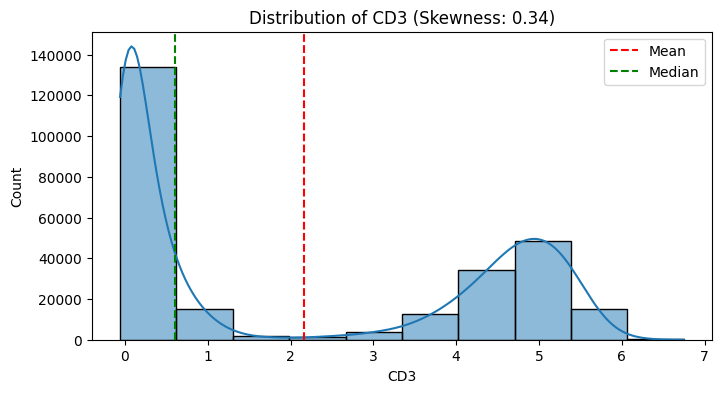

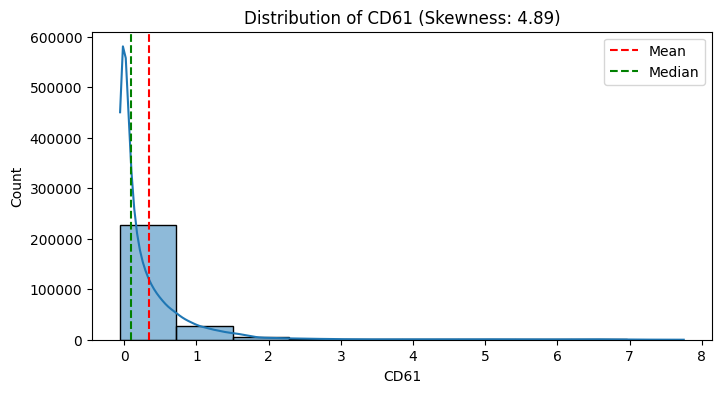

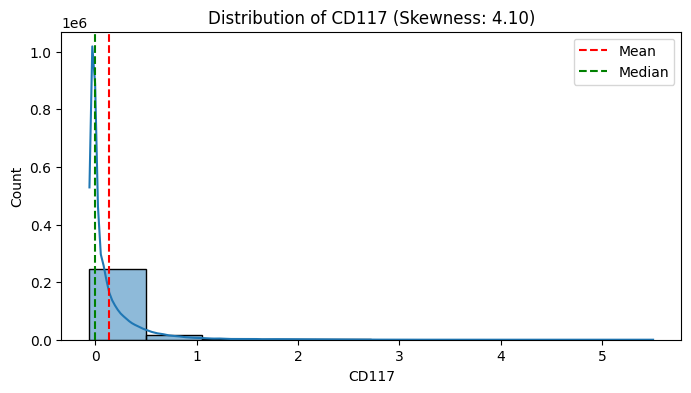

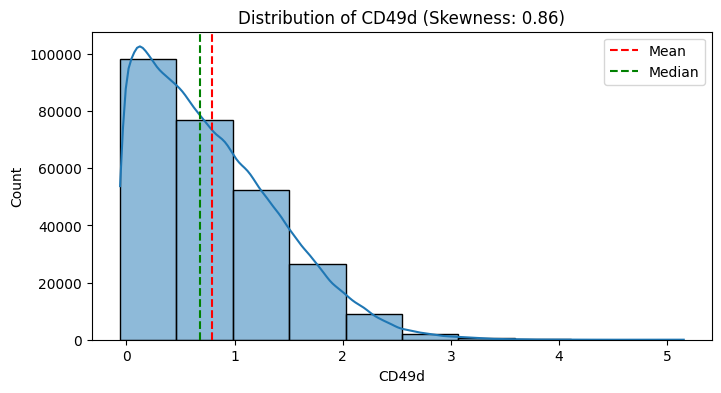

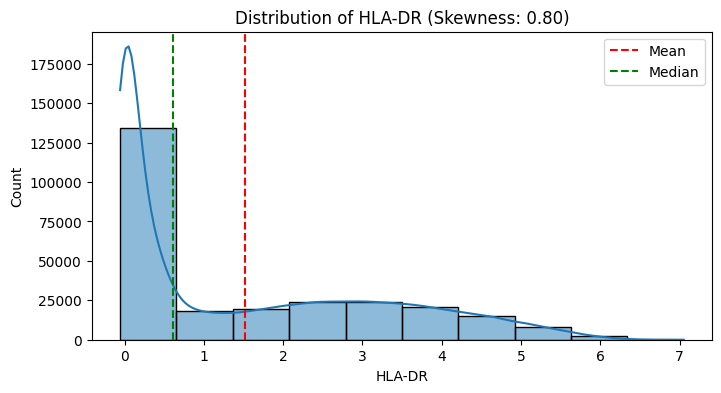

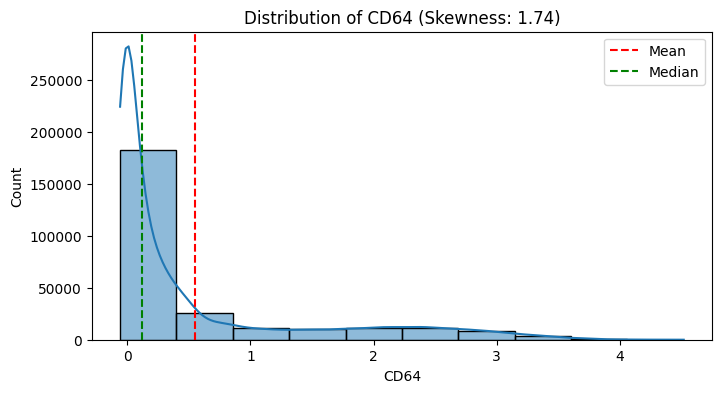

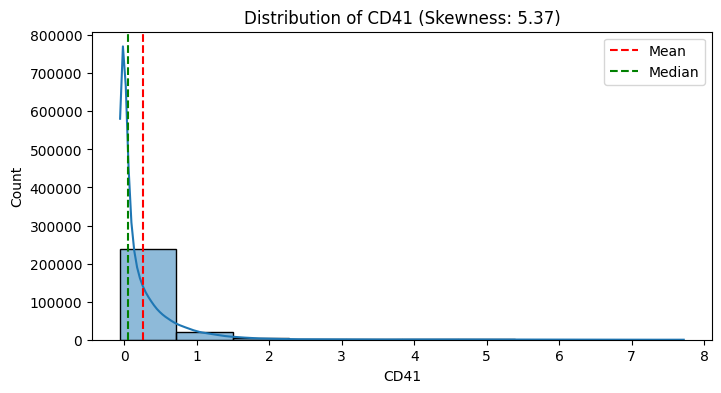

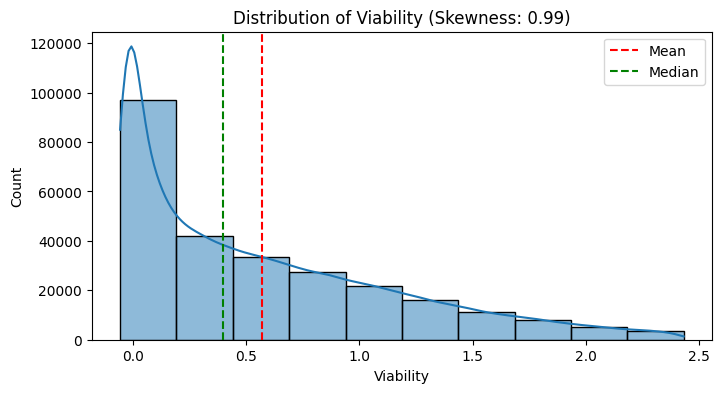

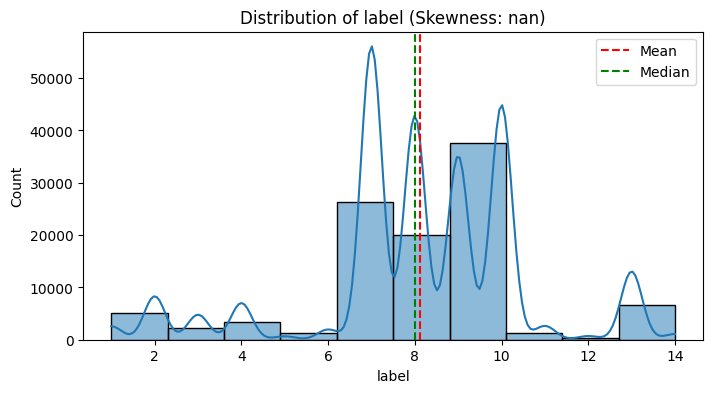

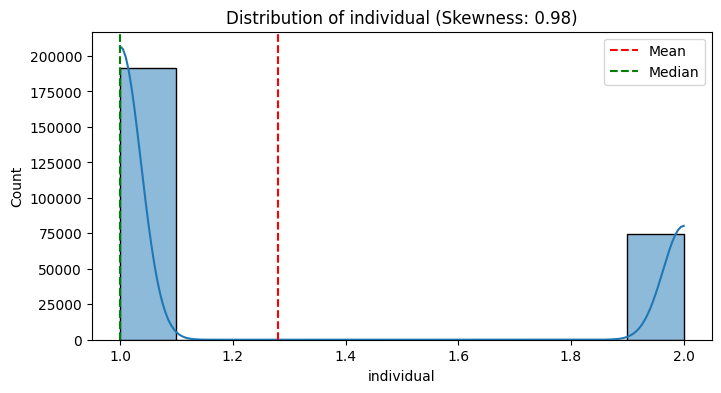

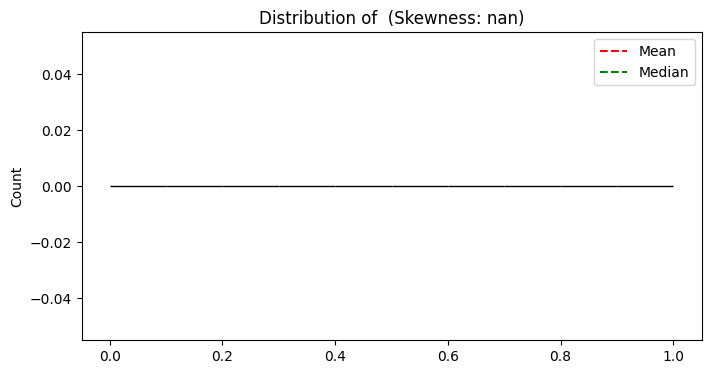

In [ ]:
# Select only numerical columns for skewness calculation
numerical_cols = levin_df.select_dtypes(include=np.number).columns
skewness = levin_df[numerical_cols].apply(skew)

# Function to categorize skewness
def categorize_skewness(value):
    if value > 0.5:
        return 'Right-skewed'
    elif value < -0.5:
        return 'Left-skewed'
    else:
        return 'Approximately symmetrical'

# Apply the categorization
skewness_category = skewness.apply(categorize_skewness)

# Display skewness and its categorization
skewness_df = pd.DataFrame({'Skewness': skewness, 'Category': skewness_category})
print(skewness_df)

# Plot histograms for each numerical column
for col in numerical_cols: # Iterate through numerical columns only
    plt.figure(figsize=(8, 4))
    sns.histplot(levin_df[col], bins=10, kde=True)
    plt.title(f'Distribution of {col} (Skewness: {skewness[col]:.2f})')
    plt.axvline(levin_df[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(levin_df[col].median(), color='green', linestyle='--', label='Median')
    plt.legend()
    plt.show()

In [ ]:
#17/10/2024

In [ ]:
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

n_samples = 1000
train_images_flat = train_images[:n_samples].reshape(n_samples, -1)
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

n_samples = 1000
train_images_flat = train_images[:n_samples].reshape(n_samples, -1)
train_labels_subset = train_labels[:n_samples]

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=1)
tsne_results = tsne.fit_transform(train_images_flat)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.136s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.756635
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.076538
[t-SNE] KL divergence after 1000 iterations: 0.892835


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.090s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.756635
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.076538
[t-SNE] KL divergence after 1000 iterations: 0.892835


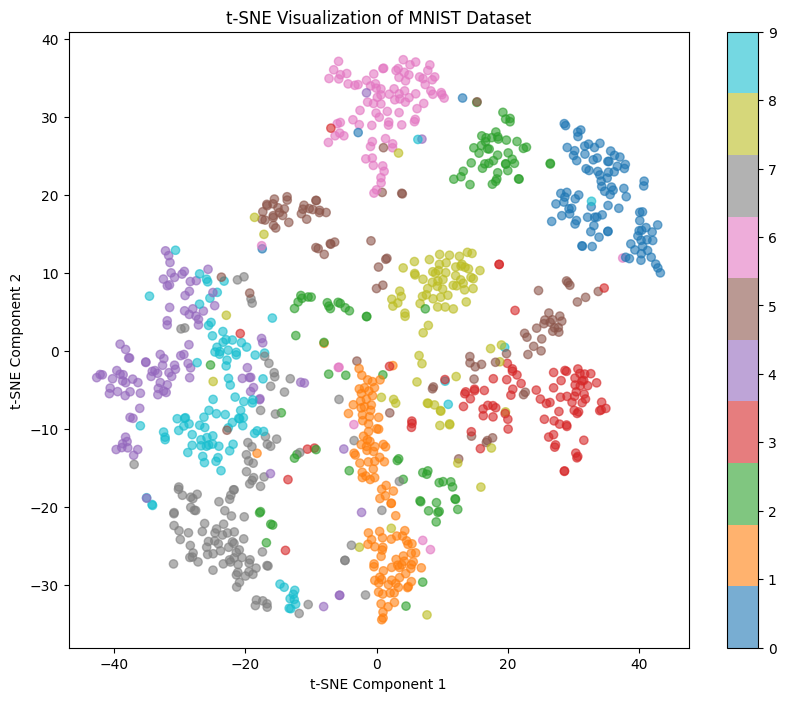

In [ ]:
train_images_tsne = tsne.fit_transform(train_images_flat)

# plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels_subset, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of MNIST Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [ ]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np # Import numpy

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Replace empty strings or spaces with NaN
levin_df = levin_df.replace(r'^\s*$', np.nan, regex=True)  # Use np.nan directly

# Convert all columns to numeric, coerce errors to NaN
for col in levin_df.columns:
    levin_df[col] = pd.to_numeric(levin_df[col], errors='coerce')

# Standardize all columns in the dataset (using the imputed data)
levin_df[:] = scaler.fit_transform(levin_df)

# Check the standardized data
print(levin_df.head())

   Cell_length      DNA1      DNA2    CD45RA     CD133      CD19      CD22  \
0     0.218182  0.380681  0.454713  0.032599  0.005102  0.010180  0.023713   
1     0.454545  0.368682  0.492802  0.112418  0.003545  0.008208  0.025250   
2     0.400000  0.249642  0.410614  0.097929  0.004631  0.026137  0.002753   
3     0.345455  0.348592  0.495353  0.072765  0.005455  0.008008  0.002543   
4     0.272727  0.282425  0.433546  0.007186  0.004974  0.027438  0.106009   

      CD11b       CD4       CD8  ...      CD61     CD117     CD49d    HLA-DR  \
0  0.009222  0.063461  0.121682  ...  0.007008  0.019914  0.174915  0.242242   
1  0.162862  0.003363  0.009986  ...  0.168595  0.026499  0.049100  0.077290   
2  0.010595  0.007376  0.011022  ...  0.040324  0.018686  0.507480  0.192154   
3  0.148887  0.005827  0.024015  ...  0.002114  0.022328  0.268010  0.027916   
4  0.219187  0.091949  0.018796  ...  0.028984  0.009253  0.045858  0.035906   

       CD64      CD41  Viability  label  individua

Index(['Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22',
       'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab',
       'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7',
       'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d',
       'HLA-DR', 'CD64', 'CD41', 'Viability', 'label', 'individual', ''],
      dtype='object')
     Standard deviation  Proportion of Variance  Cumulative Proportion
PC1            2.346218                0.152909               0.152909
PC2            1.963131                0.107052               0.259961
PC3            1.878423                0.098013               0.357973
PC4            1.625260                0.073374               0.431347


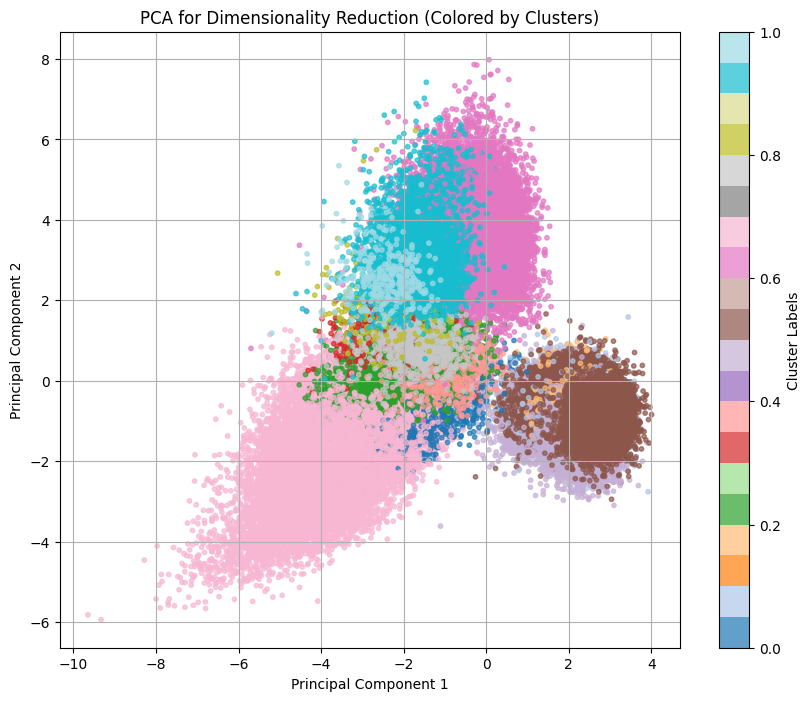

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np # Import numpy
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
print(levin_df.columns)

columns_to_drop = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'individual']  # Removed 'label' from this list

# Check if 'label' column exists before accessing it
if 'label' in levin_df.columns:
    labels = levin_df['label']
else:
    # Handle the case where 'label' column is missing
    # For example, you can create a default label array or raise an error
    print("Error: 'label' column not found in the DataFrame.")
    # If 'label' column is not found, create a default label array with all values set to 0
    labels = np.zeros(len(levin_df))  # Example: Create default labels

# Drop the columns, ensuring errors='ignore' to avoid KeyError if a column is not found
filtered_df = levin_df.drop(columns=columns_to_drop, errors='ignore')

imputer = SimpleImputer(strategy='mean')
filled_df = imputer.fit_transform(filtered_df)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(filled_df)

# Perform PCA
pca = PCA(n_components=4)  # Set to 4 components for demonstration
pca_transformed = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
std_dev = np.sqrt(pca.explained_variance_)

# Create a summary table for PCA results
pca_summary = pd.DataFrame({
    'Standard deviation': std_dev,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
}, index=[f'PC{i+1}' for i in range(len(std_dev))])
print(pca_summary)

# Scatter plot for the first two components, with different colors for different clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=labels, cmap='tab20', s=10, alpha=0.7)
plt.colorbar(scatter, label='Cluster Labels')
plt.title('PCA for Dimensionality Reduction (Colored by Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
#3D plot for PCA

Actual columns in DataFrame: ['Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d', 'HLA-DR', 'CD64', 'CD41', 'Viability', 'label', 'individual', '']
     Standard deviation  Proportion of Variance  Cumulative Proportion
PC1            2.346218                0.152909               0.152909
PC2            1.963131                0.107052               0.259961
PC3            1.878423                0.098013               0.357973
PC4            1.625260                0.073374               0.431347


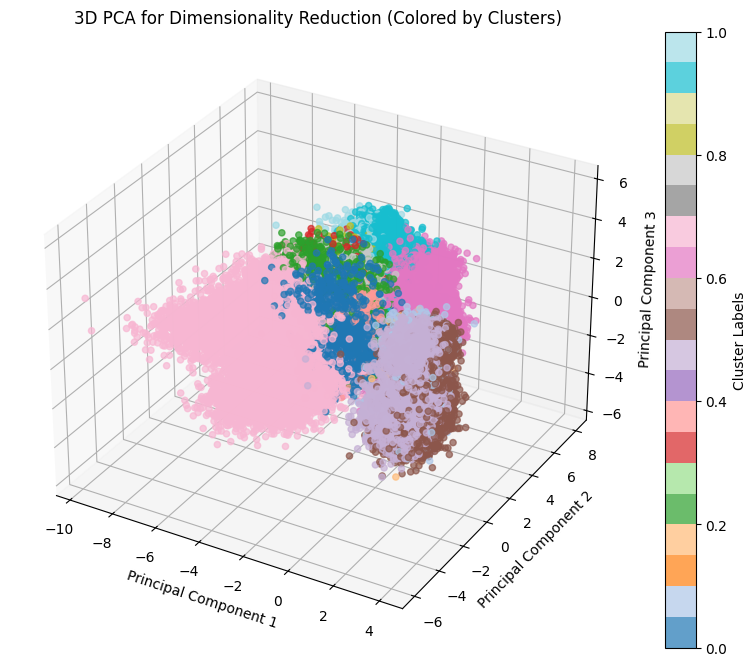

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming df is already loaded and 'label' column exists for cluster labeling

# Get actual column names from your DataFrame
actual_columns = levin_df.columns.tolist()
print(f"Actual columns in DataFrame: {actual_columns}")

# Define columns to drop, ensuring they are present in the DataFrame
columns_to_drop = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'individual']
# Removed 'label' from columns_to_drop as it's needed for labeling

# Filter out columns that are not in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in actual_columns]

# Drop the columns, errors='ignore' is no longer needed since we've filtered
filtered_df = levin_df.drop(columns=columns_to_drop)

# Check if 'label' column exists before accessing it
if 'label' in levin_df.columns:
    labels = levin_df['label']
else:
    # Handle the case where 'label' column is missing
    print("Error: 'label' column not found in the DataFrame.")
    # If 'label' column is not found, create a default label array with all values set to 0
    labels = np.zeros(len(levin_df))  # Example: Create default labels


imputer = SimpleImputer(strategy='mean')
filled_df = imputer.fit_transform(filtered_df)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(filled_df)

# Perform PCA for 4 components
pca = PCA(n_components=4)
pca_transformed = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
std_dev = np.sqrt(pca.explained_variance_)

# Create a summary table for PCA results
pca_summary = pd.DataFrame({
    'Standard deviation': std_dev,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
}, index=[f'PC{i+1}' for i in range(len(std_dev))])

print(pca_summary)
# 3D scatter plot for the first three components, with different colors for different clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_transformed[:, 0], pca_transformed[:, 1], pca_transformed[:, 2],
                     c=labels, cmap='tab20', s=20, alpha=0.7)

# Add labels and colorbar
ax.set_title('3D PCA for Dimensionality Reduction (Colored by Clusters)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter, ax=ax, label='Cluster Labels')

In [ ]:
#tsne

In [ ]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
print(levin_df.columns) # Print available column names

# Replace with actual column names from the printed output
# Carefully check spelling and case sensitivity
columns_to_remove = ['Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']

# Use a list comprehension to filter out columns not present in the DataFrame
valid_columns_to_remove = [col for col in columns_to_remove if col in levin_df.columns]

columns_to_remover = levin_df.drop(columns=valid_columns_to_remove)

len(columns_to_remover.columns)

Index(['Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22',
       'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab',
       'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7',
       'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d',
       'HLA-DR', 'CD64', 'CD41', 'Viability', 'label', 'individual', ''],
      dtype='object')


36

In [ ]:
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Select a subset of data for t-SNE
n_samples = 1000
train_images_flat = train_images[:n_samples].reshape(n_samples, -1)
train_labels_subset = train_labels[:n_samples] # Defining train_labels_subset here

features = columns_to_remover
# Instead of accessing df['label'], use the original labels before dropping columns
labels = train_labels_subset

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.314919
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.654839
[t-SNE] KL divergence after 1000 iterations: 1.557855


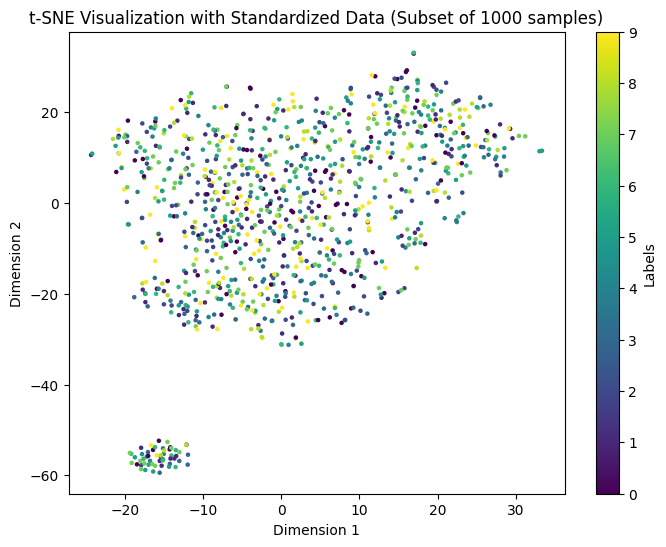

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Convert all columns to numeric, coercing errors to NaN
features = features.apply(pd.to_numeric, errors='coerce')

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with your desired strategy
features_imputed = imputer.fit_transform(features)

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_imputed)

# Updated: n_samples should match the size of labels
n_samples = min(len(features_standardized), len(labels))  # Use the minimum size

# Generate subset_indices within the bounds of both features and labels
subset_indices = np.random.choice(n_samples, n_samples, replace=False)

subset_features = features_standardized[subset_indices]
subset_labels = labels[subset_indices]

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=1)
tsne_result = tsne.fit_transform(subset_features)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=subset_labels, cmap='viridis', s=5)
plt.title('t-SNE Visualization with Standardized Data (Subset of {} samples)'.format(n_samples))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.colorbar(scatter, label='Labels')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

data = {
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [100, 200, 300, 400, 500],
    'Feature3': [1, 2, 3, 4, 5],
    'Feature4': [5, 4, 3, 2, 1]
}

df = pd.DataFrame(data)

# Scale the DataFrame using StandardScaler before using it
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # Define df_scaled here

row_index = np.random.randint(0, df_scaled.shape[0])

masking_probability = 0.5

# Corrected the function name from 'banomial' to 'binomial'
mask = np.random.binomial(1, masking_probability, df.shape)
print(mask)

original_row = df_scaled[row_index].copy() # Use indexing instead of iloc for NumPy array
masked_row = original_row.copy()

mask_output = np.where(mask, 0, 1).tolist()

[[1 0 1 0]
 [1 0 1 0]
 [0 0 0 1]
 [0 0 1 1]
 [1 0 0 0]]


In [ ]:
df_shuffle = df.apply(np.random.permutation)

print("original Data:")
print(df)

print("\nShuffled Data (Column-wise):")
print(df_shuffle)


original Data:
   Feature1  Feature2  Feature3  Feature4
0        10       100         1         5
1        20       200         2         4
2        30       300         3         3
3        40       400         4         2
4        50       500         5         1

Shuffled Data (Column-wise):
   Feature1  Feature2  Feature3  Feature4
0        10       300         4         4
1        30       200         2         2
2        40       100         3         1
3        20       400         1         5
4        50       500         5         3


In [ ]:
df_corrupted = df * (1 - mask) + df_shuffle * mask

print("Original Data:")
print(df)

print("\nCorrupted Data:")
print(df_corrupted)

Original Data:
   Feature1  Feature2  Feature3  Feature4
0        10       100         1         5
1        20       200         2         4
2        30       300         3         3
3        40       400         4         2
4        50       500         5         1

Corrupted Data:
   Feature1  Feature2  Feature3  Feature4
0        10       100         4         5
1        30       200         2         4
2        30       300         3         1
3        40       400         1         5
4        50       500         5         1


In [ ]:

def apply_corruption(df, masking_probability=0.1):

  df_scaled = df.copy()
  mask = np.random.binomial(1, masking_probability, df_scaled.shape)
  df_shuffle = df_scaled.apply(np.random.permutation)
  df_corrupted = df_scaled * (1 - mask) + df_shuffle * mask
  return df_corrupted

levin_df_corrupted = apply_corruption(levin_df, masking_probability=0.1)

print("Original DataFrame:")
print(levin_df.head())

print("\nCorrupted DataFrame:")
print(levin_df_corrupted.head())

Original DataFrame:
   Cell_length      DNA1      DNA2    CD45RA     CD133      CD19      CD22  \
0     0.218182  0.380681  0.454713  0.032599  0.005102  0.010180  0.023713   
1     0.454545  0.368682  0.492802  0.112418  0.003545  0.008208  0.025250   
2     0.400000  0.249642  0.410614  0.097929  0.004631  0.026137  0.002753   
3     0.345455  0.348592  0.495353  0.072765  0.005455  0.008008  0.002543   
4     0.272727  0.282425  0.433546  0.007186  0.004974  0.027438  0.106009   

      CD11b       CD4       CD8  ...      CD61     CD117     CD49d    HLA-DR  \
0  0.009222  0.063461  0.121682  ...  0.007008  0.019914  0.174915  0.242242   
1  0.162862  0.003363  0.009986  ...  0.168595  0.026499  0.049100  0.077290   
2  0.010595  0.007376  0.011022  ...  0.040324  0.018686  0.507480  0.192154   
3  0.148887  0.005827  0.024015  ...  0.002114  0.022328  0.268010  0.027916   
4  0.219187  0.091949  0.018796  ...  0.028984  0.009253  0.045858  0.035906   

       CD64      CD41  Viabili

In [ ]:
import pandas as pd
import numpy as np

def corrupt_data(df, corruption_prob=0.5):

    corrupted_df = df.copy()
    for col in df.columns:
        # Create a mask for the column
        mask = np.random.rand(len(df)) < corruption_prob
        # Shuffle column values
        shuffled_values = np.random.permutation(df[col].values)
        # Apply corruption using the mask and shuffled values
        corrupted_df.loc[mask, col] = shuffled_values[mask]

    return corrupted_df

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': ['p', 'q', 'r', 's', 't'],
    'C': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)

# Apply the function to the sample DataFrame
df_corrupted = corrupt_data(df, corruption_prob=0.3)  # 30% corruption probability
# Generate the mask matrix
mask_new = 1 * (df != df_corrupted)

# Print the mask matrix
print("\nMask Matrix (mask_new):")
print(mask_new)
# Print the original and corrupted DataFrames
print("Original DataFrame:")
print(df)
print("\nCorrupted DataFrame:")
print(df_corrupted)


Mask Matrix (mask_new):
   A  B  C
0  0  0  1
1  0  0  0
2  1  0  0
3  1  0  0
4  0  0  1
Original DataFrame:
   A  B   C
0  1  p  10
1  2  q  20
2  3  r  30
3  4  s  40
4  5  t  50

Corrupted DataFrame:
   A  B   C
0  1  p  50
1  2  q  20
2  4  r  30
3  5  s  40
4  5  t  10


In [ ]:
# Assuming 'df' from your previous code is the original DataFrame you want to compare
data_filtered = df  # Assign 'df' to 'data_filtered'

# Check if 'data_corrupted' exists, if not, create it using your corrupt_data function:
try:
    data_corrupted
except NameError:
    data_corrupted = corrupt_data(df, corruption_prob=0.3)  # or use your desired corruption probability

mask_new = 1 * (data_filtered != data_corrupted)

In [ ]:
mask_new

A  B  C
0  0  1  0
1  1  0  1
2  1  0  1
3  0  0  0
4  0  1  1

In [ ]:
# Assuming `data_filtered` and `data_corrupted` are meant to be `df` and `df_corrupted`, respectively
data_filtered = df  # Original DataFrame
data_corrupted = df_corrupted  # Corrupted DataFrame

# Get common columns
common_cols = data_filtered.columns.intersection(data_corrupted.columns)

# Select common columns before comparison
data_filtered_subset = data_filtered[common_cols]
data_corrupted_subset = data_corrupted[common_cols]


# Generate the mask matrix using only common columns
mask_new = 1 * (data_filtered_subset != data_corrupted_subset)

# If you need the mask to have the same shape as the original data_filtered DataFrame,
# you can reindex it and fill missing values with False (0)
mask_new = mask_new.reindex(columns=data_filtered.columns, fill_value=0)

# Print the mask matrix
print("\nMask Matrix (mask_new):")
print(mask_new)


Mask Matrix (mask_new):
   A  B  C
0  0  0  1
1  0  0  0
2  1  0  0
3  1  0  0
4  0  0  1


In [ ]:
import pandas as pd
import numpy as np

def corrupt_data(df, corruption_prob=0.5):

    corrupted_df = df.copy()
    for col in df.columns:
        # Create a mask for the column
        mask = np.random.rand(len(df)) < corruption_prob
        # Shuffle column values
        shuffled_values = np.random.permutation(df[col].values)
        # Apply corruption using the mask and shuffled values
        corrupted_df.loc[mask, col] = shuffled_values[mask]

    return corrupted_df

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': ['p', 'q', 'r', 's', 't'],
    'C': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)

# Apply the function to the sample DataFrame
df_corrupted = corrupt_data(df, corruption_prob=0.3)  # 30% corruption probability
# Get the indices of labeled (corrupted) and unlabeled (uncorrupted) data
labeled_indices = mask_new.any(axis=1)
unlabeled_indices = ~labeled_indices  # Invert the labeled indices

# Create the labeled and unlabeled datasets
x_labeled = df[labeled_indices]
y_labeled = mask_new[labeled_indices]  # Using mask_new as labels
x_unlabeled = df[unlabeled_indices]
y_unlabeled = mask_new[unlabeled_indices]  # Unlabeled data has mask values of 0

# Print the shapes of the datasets
print("Shape of x_labeled:", x_labeled.shape)
print("Shape of y_labeled:", y_labeled.shape)
print("Shape of x_unlabeled:", x_unlabeled.shape)
print("Shape of y_unlabeled:", y_unlabeled.shape)

Shape of x_labeled: (4, 3)
Shape of y_labeled: (4, 3)
Shape of x_unlabeled: (1, 3)
Shape of y_unlabeled: (1, 3)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def corrupt_data(df, corruption_prob=0.5):
    corrupted_df = df.copy()
    for col in df.columns:
        # Create a mask for the column
        mask = np.random.rand(len(df)) < corruption_prob
        # Shuffle column values
        shuffled_values = np.random.permutation(df[col].values)
        # Apply corruption using the mask and shuffled values
        corrupted_df.loc[mask, col] = shuffled_values[mask]
    return corrupted_df

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': ['p', 'q', 'r', 's', 't'],
    'C': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)

# Apply corruption function
df_corrupted = corrupt_data(df, corruption_prob=0.3)  # 30% corruption probability

# Step 1: Create mask matrix to identify corrupted cells
mask_new = (df != df_corrupted).astype(int)

# Step 2: Identify labeled (corrupted) and unlabeled (uncorrupted) data
labeled_indices = mask_new.any(axis=1)
unlabeled_indices = ~labeled_indices

# Step 3: Create labeled and unlabeled datasets
x_labeled = df[labeled_indices]
y_labeled = mask_new[labeled_indices]  # Labels for corrupted cells
x_unlabeled = df[unlabeled_indices]
y_unlabeled = mask_new[unlabeled_indices]  # All zero labels for uncorrupted data

# Step 4: Split labeled data into train and test sets (70/30 ratio)
x_train, x_test, y_train, y_test = train_test_split(
    x_labeled, y_labeled, test_size=0.3, random_state=42
)

# Display the results
print("\nLabeled Data (x_labeled):")
print(x_labeled)
print("\nLabels for Labeled Data (y_labeled):")
print(y_labeled)
print("\nUnlabeled Data (x_unlabeled):")
print(x_unlabeled)
print("\nLabels for Unlabeled Data (y_unlabeled):")
print(y_unlabeled)

print("\nTraining Data (x_train):")
print(x_train)
print("\nTraining Labels (y_train):")
print(y_train)
print("\nTesting Data (x_test):")
print(x_test)
print("\nTesting Labels (y_test):")
print(y_test)



Labeled Data (x_labeled):
   A  B   C
2  3  r  30
3  4  s  40

Labels for Labeled Data (y_labeled):
   A  B  C
2  1  0  0
3  0  0  1

Unlabeled Data (x_unlabeled):
   A  B   C
0  1  p  10
1  2  q  20
4  5  t  50

Labels for Unlabeled Data (y_unlabeled):
   A  B  C
0  0  0  0
1  0  0  0
4  0  0  0

Training Data (x_train):
   A  B   C
2  3  r  30

Training Labels (y_train):
   A  B  C
2  1  0  0

Testing Data (x_test):
   A  B   C
3  4  s  40

Testing Labels (y_test):
   A  B  C
3  0  0  1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def corrupt_data(df, corruption_prob=0.5):
    corrupted_df = df.copy()
    for col in df.columns:
        # Create a mask for the column
        mask = np.random.rand(len(df)) < corruption_prob
        # Shuffle column values
        shuffled_values = np.random.permutation(df[col].values)
        # Apply corruption using the mask and shuffled values
        corrupted_df.loc[mask, col] = shuffled_values[mask]

    return corrupted_df

# Load the Levine_32 dataset
df_levine = pd.read_csv(r'/content/drive/MyDrive/Levine_32dim.csv')

# Apply the corrupt_data function to the Levine_32 dataset
df_levine_corrupted = corrupt_data(df_levine, corruption_prob=0.3)

# Generate the mask matrix
mask_levine = 1 * (df_levine != df_levine_corrupted)

# Get the indices of labeled (corrupted) and unlabeled (uncorrupted) data
labeled_indices_levine = mask_levine.any(axis=1)
unlabeled_indices_levine = ~labeled_indices_levine

# Create the labeled and unlabeled datasets for Levine_32
x_labeled_levine = df_levine[labeled_indices_levine]
y_labeled_levine = mask_levine[labeled_indices_levine]
x_unlabeled_levine = df_levine[unlabeled_indices_levine]
y_unlabeled_levine = mask_levine[unlabeled_indices_levine]

# Split labeled data into train and test sets (70/30 ratio)
x_train_levine, x_test_levine, y_train_levine, y_test_levine = train_test_split(
    x_labeled_levine, y_labeled_levine, test_size=0.3, random_state=42
)

# Print the shapes of the datasets to verify
print("Shape of x_train_levine:", x_train_levine.shape)
print("Shape of y_train_levine:", y_train_levine.shape)
print("Shape of x_test_levine:", x_test_levine.shape)
print("Shape of y_test_levine:", y_test_levine.shape)

Shape of x_train_levine: (185938, 42)
Shape of y_train_levine: (185938, 42)
Shape of x_test_levine: (79688, 42)
Shape of y_test_levine: (79688, 42)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def corrupt_data(df, corruption_prob=0.5):
    corrupted_df = df.copy()
    for col in df.columns:

        mask = np.random.rand(len(df)) < corruption_prob

        shuffled_values = np.random.permutation(df[col].values)

        corrupted_df.loc[mask, col] = shuffled_values[mask]

    return corrupted_df


df = pd.read_csv(r'/content/drive/MyDrive/Levine_32dim.csv')

df_corrupted = corrupt_data(df, corruption_prob=0.3)


mask_new = 1 * (df != df_corrupted)

labeled_indices = mask_new.any(axis=1)
unlabeled_indices = ~labeled_indices

x_labeled = df[labeled_indices]
y_labeled = mask_new[labeled_indices].astype(int)
x_unlabeled = df[unlabeled_indices]
y_unlabeled = mask_new[unlabeled_indices].astype(int)

x_train, x_test, y_train, y_test = train_test_split(
    x_labeled, y_labeled, test_size=0.3, random_state=42
)

print("\nLabeled Data (x_labeled):")
print(x_labeled)
print("\nLabels for Labeled Data (y_labeled):")
print(y_labeled)
print("\nUnlabeled Data (x_unlabeled):")
print(x_unlabeled)
print("\nLabels for Unlabeled Data (y_unlabeled):")
print(y_unlabeled)

print("\nTraining Data (x_train):")
print(x_train)
print("\nTraining Labels (y_train):")
print(y_train)
print("\nTesting Data (x_test):")
print(x_test)
print("\nTesting Labels (y_test):")
print(y_test)


Labeled Data (x_labeled):
               Time   Cell_length      DNA1      DNA2    CD45RA     CD133  \
0         2693.0000            22  4.391057  4.617262  0.162691 -0.029585   
1         3736.0000            35  4.340481  4.816692  0.701348 -0.038280   
2         7015.0000            32  3.838727  4.386369  0.603568 -0.032216   
3         7099.0000            29  4.255805  4.830048  0.433747 -0.027611   
4         7700.0000            25  3.976909  4.506433 -0.008809 -0.030297   
...             ...           ...       ...       ...       ...       ...   
265621  707917.4375            60  6.733888  7.179924  1.901087 -0.054719   
265622  707951.4375            41  6.826629  7.133022  1.474081 -0.019174   
265623  708145.4375            45  6.787791  7.154027  0.116755 -0.056213   
265624  708398.4375            41  6.889866  7.141219  0.684921 -0.006264   
265625  708585.4375            39  6.865218  7.144353  0.288761 -0.011310   

            CD19      CD22     CD11b       CD4  

In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file into the DataFrame first
df = pd.read_csv(r'/content/drive/MyDrive/Levine_32dim.csv')
print(df.head())

# Check if 'label' column exists. If not, handle it accordingly.
if 'label' in df.columns:
  label_column = 'label' # Assign 'label' to label_column if it exists
else:
  print(f"Label column 'label' not found in the dataset. Using index instead.")
  label_column = df.index

label_column = 'label' if 'label' in df.columns else None

# If the label column is None (i.e. it wasn't found)
if label_column is None:
    print(f"Label column 'label' not found in the dataset. Using index instead.")
    # If we want to proceed with index as 'label', we can create a new column:
    df['label'] = df.index
    label_column = 'label'  # Update label_column to reflect the new column
else:
    print("Label column found in the dataset.")


     Time   Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
0  2693.0            22  4.391057  4.617262  0.162691 -0.029585 -0.006696   
1  3736.0            35  4.340481  4.816692  0.701348 -0.038280 -0.016654   
2  7015.0            32  3.838727  4.386369  0.603568 -0.032216  0.073855   
3  7099.0            29  4.255805  4.830048  0.433747 -0.027611 -0.017661   
4  7700.0            25  3.976909  4.506433 -0.008809 -0.030297  0.080423   

       CD22     CD11b       CD4  ...     CD49d    HLA-DR      CD64      CD41  \
0  0.066388 -0.009184  0.363602  ...  0.853505  1.664480 -0.005376 -0.001961   
1  0.074409  0.808031 -0.035424  ...  0.197818  0.491592  0.144814  0.868014   
2 -0.042977 -0.001881 -0.008781  ...  2.586670  1.308337 -0.010961 -0.010413   
3 -0.044072  0.733698 -0.019066  ...  1.338669  0.140523 -0.013449 -0.026039   
4  0.495791  1.107627  0.552746  ...  0.180924  0.197332  0.076167 -0.040488   

    Viability   file_number   event_number   label   ind

In [ ]:
import pandas as pd
import numpy as np

label_column = 'label'

# Create or load your DataFrame here
# Replace 'your_data.csv' with the actual path to your data file if loading from a file
# new_df = pd.read_csv('your_data.csv')
# Or create a DataFrame from other sources, e.g.,:
df = pd.read_csv(r'/content/drive/MyDrive/Levine_32dim.csv')

# Check if the label column exists
if label_column in df.columns:
    # Split the data based on the presence of labels
    labeled_data = df.dropna(subset=[label_column])
    unlabeled_data = df[df[label_column].isna()]

    # Optional: Drop the label column from the unlabeled data (as they are not needed)
    unlabeled_data = unlabeled_data.drop(columns=[label_column])

    print("Labeled Data:")
    print(labeled_data.head())
    print("\nUnlabeled Data:")
    print(unlabeled_data.head())
else:
    print(f"Label column '{label_column}' not found in the dataset.")

Label column 'label' not found in the dataset.


In [ ]:
from sklearn.model_selection import train_test_split

# Replace 'labeled_data' with the actual labeled data variables
x = x_labeled  # Features of labeled data
y = y_labeled  # Labels of labeled data

# Split the labeled data into 70% training and 30% test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display results
print("Training features (X_train):")
print(x_train.head())
print("\nTest features (X_test):")
print(x_test.head())
print("\nTraining labels (y_train):")
print(y_train.head())
print("\nTest labels (y_test):")
print(y_test.head())

print("\nShape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X:", x.shape)
print("Shape of y:", y.shape)


Training features (X_train):
            Time   Cell_length      DNA1      DNA2    CD45RA     CD133  \
121131   73612.0            37  3.104567  4.004219  0.200147 -0.037841   
207765  470393.0            33  3.394722  4.371562  0.400141  0.321116   
72182   567753.0            29  3.630845  4.471507  0.797058  0.310841   
50911   505487.0            22  3.221981  4.528588  0.427810 -0.046120   
22336   424718.0            30  3.959151  4.539984  0.739531 -0.006289   

            CD19      CD22     CD11b       CD4  ...     CD49d    HLA-DR  \
121131  0.079140  0.442165  2.081038 -0.011877  ...  1.615350  2.821002   
207765  0.647924 -0.017609  0.208705 -0.025001  ...  0.052763  0.973452   
72182   1.526767 -0.015747  0.784267 -0.008252  ...  2.275365  2.919452   
50911   2.706543  3.028495  0.162550  0.094481  ...  0.210280  2.638860   
22336   0.038441 -0.008545  0.073549  0.471662  ...  0.767908 -0.040116   

            CD64      CD41   Viability   file_number   event_number   label

In [ ]:
# from sklearn.model_selection import train_test_split

# label_column = 'label'

# # Separate features (X) and labels (y) from the labeled data
# x = labeled_data.drop(columns=[label_column])
# y = labeled_data[label_column]

# # Split the labeled data into 70% training and 30% test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# print("Training features (X_train):")
# print(x_train.head())
# print("\nTest features (X_test):")
# print(x_test.head())
# print("\nTraining labels (y_train):")
# print(y_train.head())
# print("\nTest labels (y_test):")
# print(y_test.head())
# print("\nShape of X_train:", x_train.shape)
# print("Shape of X_test:", x_test.shape)
# print("Shape of y_train:", y_train.shape)
# print("Shape of y_test:", y_test.shape)
# print("shape of X", x.shape)
# print("shape of y", y.shape)

In [ ]:
#implement logistic regression and xgboost using sklearn library for your x_train, y_train data and test it on x_test data. return the ouptuts probabilities**

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np

# Generate a synthetic dataset for demonstration
x, y = make_classification(n_samples=100, n_features=10, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

def logistic_regression_with_outputs(x_train, y_train, x_test):
    """
    Implements Logistic Regression and returns output probabilities.

    Args:
        x_train, y_train: Training data.
        x_test: Testing data.

    Returns:
        y_pred_prob: Predicted probabilities for x_test.
    """
    # Create and train the Logistic Regression model
    model = LogisticRegression()
    model.fit(x_train, y_train)

    # Predict probabilities on the test data
    y_pred_prob = model.predict_proba(x_test)

    # Print the output probabilities
    print("Logistic Regression Output Probabilities:")
    print(y_pred_prob)

    return y_pred_prob

def xgboost_with_outputs(x_train, y_train, x_test):
    """
    Implements XGBoost and returns output probabilities.

    Args:
        x_train, y_train: Training data.
        x_test: Testing data.

    Returns:
        y_pred_prob: Predicted probabilities for x_test.
    """
    # Create and train the XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(x_train, y_train)

    # Predict probabilities on the test data
    y_pred_prob = model.predict_proba(x_test)

    # Print the output probabilities
    print("\nXGBoost Output Probabilities:")
    print(y_pred_prob)

    return y_pred_prob

# Call the Logistic Regression function and print results
y_pred_prob_logistic = logistic_regression_with_outputs(x_train, y_train, x_test)
print("\nFinal Logistic Regression Probabilities:")
print(y_pred_prob_logistic)

# Call the XGBoost function and print results
y_pred_prob_xgboost = xgboost_with_outputs(x_train, y_train, x_test)
print("\nFinal XGBoost Probabilities:")
print(y_pred_prob_xgboost)

Logistic Regression Output Probabilities:
[[9.04675251e-01 9.53247494e-02]
 [7.97965075e-02 9.20203492e-01]
 [1.33736145e-02 9.86626386e-01]
 [7.86373395e-02 9.21362661e-01]
 [2.07691091e-02 9.79230891e-01]
 [9.72546031e-01 2.74539693e-02]
 [9.78171609e-01 2.18283908e-02]
 [2.54443533e-01 7.45556467e-01]
 [2.14117582e-01 7.85882418e-01]
 [1.65396820e-01 8.34603180e-01]
 [9.88737978e-01 1.12620223e-02]
 [2.80587665e-03 9.97194123e-01]
 [7.85824805e-04 9.99214175e-01]
 [9.99130522e-01 8.69477913e-04]
 [5.13601693e-03 9.94863983e-01]
 [9.67299512e-01 3.27004880e-02]
 [3.91255210e-02 9.60874479e-01]
 [9.82741573e-01 1.72584274e-02]
 [9.69083770e-01 3.09162297e-02]
 [9.97698675e-01 2.30132477e-03]]

Final Logistic Regression Probabilities:
[[9.04675251e-01 9.53247494e-02]
 [7.97965075e-02 9.20203492e-01]
 [1.33736145e-02 9.86626386e-01]
 [7.86373395e-02 9.21362661e-01]
 [2.07691091e-02 9.79230891e-01]
 [9.72546031e-01 2.74539693e-02]
 [9.78171609e-01 2.18283908e-02]
 [2.54443533e-01 7.45556

In [ ]:
#Calculating the Logistic Regression Log Loss and XGBoost Log Loss

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss # Import log_loss
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np

# Generate a synthetic dataset for demonstration
x, y = make_classification(n_samples=100, n_features=10, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

def logistic_regression_with_outputs(x_train, y_train, x_test, y_test): # Added y_test
    """
    Implements Logistic Regression, calculates and prints log loss.

    Args:
        x_train, y_train: Training data.
        x_test, y_test: Testing data.

    Returns:
        y_pred_prob: Predicted probabilities for x_test.
    """
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pred_prob = model.predict_proba(x_test)

    # Calculate and print log loss
    lr_log_loss = log_loss(y_test, y_pred_prob)
    print(f"Logistic Regression Log Loss: {lr_log_loss}")

    return y_pred_prob

def xgboost_with_outputs(x_train, y_train, x_test, y_test): # Added y_test
    """
    Implements XGBoost, calculates and prints log loss.

    Args:
        x_train, y_train: Training data.
        x_test, y_test: Testing data.

    Returns:
        y_pred_prob: Predicted probabilities for x_test.
    """
    model = XGBClassifier()
    model.fit(x_train, y_train)
    y_pred_prob = model.predict_proba(x_test)

    # Calculate and print log loss
    xgb_log_loss = log_loss(y_test, y_pred_prob)
    print(f"XGBoost Log Loss: {xgb_log_loss}")

    return y_pred_prob

# Example usage:
logistic_regression_probs = logistic_regression_with_outputs(x_train, y_train, x_test, y_test) # Pass y_test
xgboost_probs = xgboost_with_outputs(x_train, y_train, x_test, y_test) # Pass y_test

Logistic Regression Log Loss: 0.060509459503793404
XGBoost Log Loss: 0.03575391160039887


In [ ]:
#The log loss along with there Predicted Probabilities

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  # Import XGBClassifier
from sklearn.metrics import log_loss
import numpy as np

# Define the logistic regression function
def Logistic(x_train, y_train, x_test, y_test):
     # Check and reshape y_train if needed
    if len(y_train.shape) > 1:
        y_train = y_train.ravel()

    # Define and fit the logistic regression model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(x_train, y_train)

    # Predict probabilities on x_test
    y_test_hat = model.predict_proba(x_test)

    # Calculate log loss using the true labels (y_test) and predicted probabilities (y_test_hat)
    loss = log_loss(y_test, y_test_hat)

    return y_test_hat, loss

# Define the XGBoost function
def XGBoost(x_train, y_train, x_test, y_test):
    # Check and reshape y_train if needed
    if len(y_train.shape) > 1:
        y_train = y_train.ravel()

    # Define and fit the XGBoost model
    model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')  # Initialize XGBClassifier
    model.fit(x_train, y_train)

    # Predict probabilities on x_test
    y_test_hat = model.predict_proba(x_test)

    # Calculate log loss
    loss = log_loss(y_test, y_test_hat)

    return y_test_hat, loss

# Get predicted probabilities and log loss for Logistic Regression
y_test_probabilities_logistic, loss_value_logistic = Logistic(x_train, y_train, x_test, y_test)

# Get predicted probabilities and log loss for XGBoost
y_test_probabilities_xgboost, loss_value_xgboost = XGBoost(x_train, y_train, x_test, y_test)

# Print results
print("Logistic Regression:")
print("Predicted probabilities:\n", y_test_probabilities_logistic)
print("\nLog Loss:", loss_value_logistic)

print("\nXGBoost:")
print("Predicted probabilities:\n", y_test_probabilities_xgboost)
print("\nLog Loss:", loss_value_xgboost)

Logistic Regression:
Predicted probabilities:
 [[9.04675251e-01 9.53247494e-02]
 [7.97965075e-02 9.20203492e-01]
 [1.33736145e-02 9.86626386e-01]
 [7.86373395e-02 9.21362661e-01]
 [2.07691091e-02 9.79230891e-01]
 [9.72546031e-01 2.74539693e-02]
 [9.78171609e-01 2.18283908e-02]
 [2.54443533e-01 7.45556467e-01]
 [2.14117582e-01 7.85882418e-01]
 [1.65396820e-01 8.34603180e-01]
 [9.88737978e-01 1.12620223e-02]
 [2.80587665e-03 9.97194123e-01]
 [7.85824805e-04 9.99214175e-01]
 [9.99130522e-01 8.69477913e-04]
 [5.13601693e-03 9.94863983e-01]
 [9.67299512e-01 3.27004880e-02]
 [3.91255210e-02 9.60874479e-01]
 [9.82741573e-01 1.72584274e-02]
 [9.69083770e-01 3.09162297e-02]
 [9.97698675e-01 2.30132477e-03]]

Log Loss: 0.060509459503793404

XGBoost:
Predicted probabilities:
 [[0.973202   0.02679799]
 [0.05494148 0.9450585 ]
 [0.03825974 0.96174026]
 [0.0221805  0.9778195 ]
 [0.00801504 0.99198496]
 [0.98203075 0.01796927]
 [0.97422457 0.02577544]
 [0.03004247 0.96995753]
 [0.02741474 0.97258526]

In [ ]:


from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

# ... (Your existing code for data loading and splitting) ...

# Assuming you have your x_train, y_train, x_test, y_test data prepared

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))


# K-Nearest Neighbors
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))

# Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))


# Naive Bayes
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred))


# Random Forest
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00    

In [ ]:
#Create a function called as self_supervised, x_unlabeled dataset,masking probability,alpha,parameters

In [ ]:
#Encoder part of auto encoder use Keras

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

def self_supervised(x_unlabeled, masking_probability=0.3, alpha=1.0):
  """
  Applies self-supervised learning with binary masking to an unlabeled dataset.

  Args:
    x_unlabeled: The unlabeled dataset as a NumPy array.
    masking_probability: The probability of masking an element (default: 0.3).
    alpha: A hyperparameter to control the weight of the reconstruction loss.

  Returns:
    encoder: The trained encoder model.
  """

  # 1. Create binary mask
  mask = np.random.binomial(1, masking_probability, x_unlabeled.shape)

  # 2. Apply mask to input data
  masked_data = x_unlabeled * mask

  # 3. Define encoder model
  input_dim = x_unlabeled.shape[1]  # Assuming features are columns
  latent_dim = 16  # Adjust latent dimension as needed

  encoder_input = keras.Input(shape=(input_dim,))
  encoded = layers.Dense(32, activation='relu')(encoder_input)
  encoded = layers.Dense(latent_dim, activation='relu')(encoded)
  encoder = keras.Model(encoder_input, encoded)

  # 4. Define decoder model
  decoder_input = keras.Input(shape=(latent_dim,))
  decoded = layers.Dense(32, activation='relu')(decoder_input)
  decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)  # Sigmoid for reconstruction
  decoder = keras.Model(decoder_input, decoded)

  # 5. Define autoencoder model
  autoencoder = keras.Model(encoder_input, decoder(encoder(encoder_input)))

  # 6. Compile and train the autoencoder
  autoencoder.compile(optimizer='adam', loss='mse')  # MSE loss for reconstruction
  autoencoder.fit(masked_data, x_unlabeled, epochs=10, batch_size=32)  # Adjust epochs and batch size

  # Get a sample input from x_unlabeled (e.g., the first row)
  sample_input = x_unlabeled[0].reshape(1, -1)  # Reshape to (1, num_features)

  # Get the encoded representation of the sample input
  encoded_output = encoder.predict(sample_input)

  print("Encoded Output for Sample Input:")
  print(encoded_output)  # Print the encoded representation

  return encoder

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model

# Load the Levine_32dim dataset
df = pd.read_csv('/content/drive/MyDrive/Levine_32dim.csv')

# Handle missing label column
if 'label' not in df.columns:
    print("Label column 'label' not found in the dataset. Using index instead.")
    df['label'] = df.index  # Use index as a placeholder for label

# Separate features and convert to numeric, handling errors
features = df.drop(columns=['label'], errors='ignore')
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)  # Fill NaN values with 0
x_data = features.values  # Convert features to NumPy array

# Split data into labeled and unlabeled sets
labeled_data = df.dropna(subset=['label'])
unlabeled_data = df[df['label'].isna()]
x_labeled = labeled_data.drop(columns=['label']).values
x_unlabeled = unlabeled_data.drop(columns=['label'], errors='ignore').values if not unlabeled_data.empty else None

# Define the self_supervised function
def self_supervised(x_unlabeled, p_m=0.5, alpha=0.5, parameters={'epochs': 10, 'batch_size': 32}):
    """
    Trains a self-supervised autoencoder with binary masking.

    Args:
        x_unlabeled (np.ndarray): Unlabeled data.
        p_m (float): Masking probability.
        alpha (float): Weight for mask estimation loss.
        parameters (dict): Training parameters, with 'epochs' and 'batch_size'.

    Returns:
        encoder (Model): Trained encoder model.
    """
    # Retrieve model parameters
    epochs = parameters.get('epochs', 10)
    batch_size = parameters.get('batch_size', 32)

    # Model dimensions
    _, dimension = x_unlabeled.shape

    # Define autoencoder model
    input_layer = Input(shape=(dimension,))
    hidden = Dense(dimension, activation='relu')(input_layer)
    mask_estimation = Dense(dimension, activation='sigmoid', name='mask_estimation')(hidden)
    feature_estimation = Dense(dimension, activation='sigmoid', name='feature_estimation')(hidden)
    autoencoder = Model(inputs=input_layer, outputs=[mask_estimation, feature_estimation])

    # Compile autoencoder with specific loss functions and weights
    autoencoder.compile(optimizer='adam',
                        loss={'mask_estimation': 'binary_crossentropy',
                              'feature_estimation': 'mse'},
                        loss_weights={'mask_estimation': alpha, 'feature_estimation': 1 - alpha})

    # Corrupt data with binary mask
    mask = np.random.binomial(1, p_m, x_unlabeled.shape)
    x_corrupted = x_unlabeled * mask

    # Train autoencoder
    autoencoder.fit(x_corrupted, {'mask_estimation': mask, 'feature_estimation': x_unlabeled},
                    epochs=epochs, batch_size=batch_size, verbose=1)

    # Extract encoder
    encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('mask_estimation').output)

    return encoder

# Train self-supervised encoder on unlabeled data
if x_unlabeled is not None:
    encoder = self_supervised(x_unlabeled, p_m=0.3, alpha=0.7, parameters={'epochs': 20, 'batch_size': 64})
else:
    print("No unlabeled data available for self-supervised training.")

# Display results of the encoder
print("Self-supervised training completed.")
# Further code to utilize the encoder for downstream tasks can be added here


Label column 'label' not found in the dataset. Using index instead.
No unlabeled data available for self-supervised training.
Self-supervised training completed.


In [ ]:
# from keras.layers import Input, Dense
# from keras.models import Model
# import numpy as np

# # Define the self_supervised function
# def self_supervised(x_unlabeled, p_m, alpha, parameters):
#     # Extract batch_size & epochs
#     epochs = parameters['epochs']
#     batch_size = parameters['batch_size']
#     _, dimension = x_unlabeled.shape

#     # Model creation
#     input_layer = Input(shape=(dimension,))

#     # Encoder model
#     h = Dense(int(dimension), activation='relu')(input_layer)

#     # Output 1: Mask estimation
#     output1 = Dense(int(dimension), activation='sigmoid', name='mask_estimation')(h)

#     # Output 2: Feature estimation
#     output2 = Dense(int(dimension), activation='sigmoid', name='feature_estimation')(h)

#     # Model definition with dual outputs
#     model = Model(inputs=input_layer, outputs=[output1, output2])

#     # Compile the model
#     model.compile(optimizer="rmsprop",
#                   loss={'mask_estimation': "binary_crossentropy",
#                         'feature_estimation': 'mean_squared_error'},
#                   loss_weights={'mask_estimation': alpha, 'feature_estimation': 1 - alpha})

#     # Generate corruption binary mask and apply corruption
#     corruption_binary_mask = binary_mask(p_m, x_unlabeled)  # returns binary mask with dimensions of x_unlabeled
#     x_unlabeled_corrupted = corruption(corruption_binary_mask, x_unlabeled)  # returns corrupted dataset

#     # Train the model
#     model.fit(x_unlabeled_corrupted,
#               {'mask_estimation': corruption_binary_mask, 'feature_estimation': x_unlabeled},
#               epochs=epochs, batch_size=batch_size, verbose=1)

#     return model

# # Define the binary_mask function
# def binary_mask(p_m, data):
#     """Creates a binary mask with a probability `p_m` for each element."""
#     return np.random.binomial(1, p_m, data.shape)

# # Define the corruption function
# def corruption(mask, data):
#     """Applies the mask to the data to create corrupted data."""
#     return data * mask

# # Example usage
# x_unlabeled = np.random.rand(100, 37)  # Sample unlabeled data with 37 features
# parameters = {'epochs': 10, 'batch_size': 32}
# p_m = 0.3  # Probability of masking
# alpha = 0.7  # Loss weight for mask estimation

# # Call self_supervised function
# model = self_supervised(x_unlabeled, p_m, alpha, parameters)


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

# Define the self_supervised function
def self_supervised(x_unlabeled, p_m, alpha, parameters):
    # Extract batch_size & epochs
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    _, dimension = x_unlabeled.shape

    # Model creation
    input_layer = Input(shape=(dimension,))

    # Encoder model
    h = Dense(int(dimension), activation='relu')(input_layer)

    # Output 1: Mask estimation
    output1 = Dense(int(dimension), activation='sigmoid', name='mask_estimation')(h)

    # Output 2: Feature estimation
    output2 = Dense(int(dimension), activation='sigmoid', name='feature_estimation')(h)

    # Model definition with dual outputs
    model = Model(inputs=input_layer, outputs=[output1, output2])

    # Compile the model
    model.compile(optimizer="rmsprop",
                  loss={'mask_estimation': "binary_crossentropy",
                        'feature_estimation': 'mean_squared_error'},
                  loss_weights={'mask_estimation': alpha, 'feature_estimation': 1 - alpha})

    # Generate corruption binary mask and apply corruption
    corruption_binary_mask = binary_mask(p_m, x_unlabeled)  # returns binary mask with dimensions of x_unlabeled
    x_unlabeled_corrupted = corruption(corruption_binary_mask, x_unlabeled)  # returns corrupted dataset

    # Train the model
    model.fit(x_unlabeled_corrupted,
              {'mask_estimation': corruption_binary_mask, 'feature_estimation': x_unlabeled},
              epochs=epochs, batch_size=batch_size, verbose=1)

    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model.model(inputs=model.input, outputs=layer_output)

    return encoder

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

# Define the self_supervised function
def self_supervised(x_unlabeled, p_m, alpha, parameters):
    # Extract batch_size & epochs
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    _, dimension = x_unlabeled.shape

    # Model creation
    input_layer = Input(shape=(dimension,))

    # Encoder model
    h = Dense(int(dimension), activation='relu')(input_layer)

    # Output 1: Mask estimation
    output1 = Dense(int(dimension), activation='sigmoid', name='mask_estimation')(h)

    # Output 2: Feature estimation
    output2 = Dense(int(dimension), activation='sigmoid', name='feature_estimation')(h)

    # Model definition with dual outputs
    model = Model(inputs=input_layer, outputs=[output1, output2])

    # Compile the model
    model.compile(optimizer="rmsprop",
                  loss={'mask_estimation': "binary_crossentropy",
                        'feature_estimation': 'mean_squared_error'},
                  loss_weights={'mask_estimation': alpha, 'feature_estimation': 1 - alpha})

    # Generate corruption binary mask and apply corruption
    corruption_binary_mask = binary_mask(p_m, x_unlabeled)  # returns binary mask with dimensions of x_unlabeled
    x_unlabeled_corrupted = corruption(corruption_binary_mask, x_unlabeled)  # returns corrupted dataset

    # Train the model
    model.fit(x_unlabeled_corrupted,
              {'mask_estimation': corruption_binary_mask, 'feature_estimation': x_unlabeled},
              epochs=epochs, batch_size=batch_size, verbose=1)

    # Define name_of_layer here, referencing the desired layer's name
    name_of_layer = 'mask_estimation'  # Or 'feature_estimation', or the name of another layer you want

    # Create the encoder using the existing model's input and the desired output layer
    encoder = Model(inputs=model.input, outputs=model.get_layer(name_of_layer).output)

    return encoder

In [ ]:
print(model.summary())

In [ ]:
from keras.models import load_model
file_path= "content/encoder.keras"
model.save(file_path)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define binary mask generation function
def binary_mask(p_m, x):
    """
    Generate a binary mask with the same shape as x, where each element is set to 0 with probability p_m.
    """
    return np.random.binomial(1, 1 - p_m, x.shape)

# Define corruption function
def corruption(mask, x):
    """
    Apply the mask to x, setting masked elements to 0 to simulate corrupted input.
    """
    return x * mask

# Define the self-supervised function
def self_supervised(x_unlabeled, p_m, alpha, parameters):
    # Extract batch_size and epochs from parameters
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    learning_rate = parameters['learning_rate']
    hidden_units = parameters['hidden']
    _, dimension = x_unlabeled.shape

    # Input layer
    input_layer = Input(shape=(dimension,))

    # Encoder layer
    h = Dense(hidden_units, activation='relu')(input_layer)  # Use hidden_units for the number of neurons

    # Output 1 --> mask estimation
    output1 = Dense(dimension, activation='sigmoid', name='mask_estimation')(h)

    # Output 2 --> feature estimation
    output2 = Dense(dimension, activation='sigmoid', name='feature_estimation')(h)

    # Model definition
    model = Model(inputs=input_layer, outputs=[output1, output2])

    # Compile the model with custom loss weights as floats
    model.compile(
        optimizer="rmsprop",  # Using the optimizer defined by the user
        loss={'mask_estimation': "binary_crossentropy", 'feature_estimation': 'mean_squared_error'},
        loss_weights={'mask_estimation': 1.0, 'feature_estimation': float(alpha)}
    )

    # Generate corruption binary mask
    corruption_binary_mask = binary_mask(p_m, x_unlabeled)

    # Corrupt the unlabeled data
    x_unlabeled_corrupted = corruption(corruption_binary_mask, x_unlabeled)

    # New mask label for the additional model fitting
    mask_label = corruption(corruption_binary_mask, x_unlabeled)

    # Training the model with corrupted data and mask label
    history = model.fit(
        x_unlabeled_corrupted,
        {'mask_estimation': mask_label, 'feature_estimation': x_unlabeled},
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Extract encoder part of the model
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder, model, history


# Example usage
# Example raw data (replace with your actual data)
x_unlabeled = np.random.rand(100, 37)  # 100 samples, 37 features (replace with your data)

# Scale the data using StandardScaler
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(x_unlabeled)  # Scaled data

# Masking probability, alpha value, and parameters
p_m = 0.3  # Masking probability
alpha = 2.0  # Weight for feature estimation loss

# Parameters for training
parameters = {
    'batch_size': 128,         # Batch size for training
    'epochs': 50,              # Number of epochs for training
    'learning_rate': 0.001,    # Learning rate for the optimizer
    'hidden': 64               # Number of neurons in the hidden layer
}

# Run self-supervised training
encoder, model, history = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)

# Print the model summary
model.summary()

# Optionally, you can also print the training history
print("Training history:", history.history)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.2250   
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.1543
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 3.1039
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0622
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3.0256
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2.9925
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.9618
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.9330
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.9056
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.8794
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.8541
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.8296
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2.8058
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.7826
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.7600
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 37)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │          2,432 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mask_estimation (Dense)   │ (None, 37)             │          2,405 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_estimation        │ (None, 37)             │          2,405 │ dense[0][0]            │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,486 (56.59 KB)

 Trainable params: 7,242 (28.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,244 (28.30 KB)

Training history: {'loss': [3.224968671798706, 3.154341220855713, 3.1038570404052734, 3.062155246734619, 3.0256104469299316, 2.9924633502960205, 2.9617984294891357, 2.9330148696899414, 2.9056427478790283, 2.87939453125, 2.85408091545105, 2.8295843601226807, 2.805788516998291, 2.7826039791107178, 2.759960412979126, 2.737781047821045, 2.7159862518310547, 2.694516897201538, 2.67336368560791, 2.6524906158447266, 2.6319057941436768, 2.611582040786743, 2.591520309448242, 2.571718215942383, 2.5521490573883057, 2.532736301422119, 2.513510227203369, 2.4944827556610107, 2.4755654335021973, 2.456847906112671, 2.4383187294006348, 2.419969081878662, 2.4018025398254395, 2.383795976638794, 2.3659861087799072, 2.3483505249023438, 2.3308753967285156, 2.3135452270507812, 2.296369791030884, 2.279376268386841, 2.2625505924224854, 2.2458693981170654, 2.229274272918701, 2.2127795219421387, 2.1964073181152344, 2.180180549621582, 2.1640701293945312, 2.14807391166687, 2.132195472717285, 2.1164228916168213]}


In [ ]:
# def corruption(mask, data):
#     num_samples, num_features = data.shape
#     shuffled_data = np.zeros([num_samples, num_features])

#     for feature_idx in range(num_features):
#         shuffled_indices = np.random.permutation(num_samples)
#         shuffled_data[:, feature_idx] = data[shuffled_indices, feature_idx]

#     data_corrupted = data * (1 - mask) + shuffled_data * mask
#     mask_new = (data != data_corrupted).astype(int)

#     return mask_new, data_corrupted

In [ ]:
# Define other parameters
p_m = 0.3
alpha = 2.0
parameters = {
    'batch_size': 128,
    'epochs': 50,
    'learning_rate': 0.001,    # Add learning rate to parameters
    'hidden': 64               # Add hidden units to parameters
}

# Run the self_supervised function with the scaled data
encoder = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)

Epoch 1/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: nan
Epoch 2/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: nan
Epoch 3/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: nan
Epoch 4/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: nan
Epoch 5/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: nan
Epoch 6/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: nan
Epoch 7/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: nan
Epoch 8/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: nan
Epoch 9/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: nan
Epoch 10/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: nan
Epoch 11/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: nan
Epoch 12/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: nan
Epoch 13/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: nan
Epoch 14/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: nan
Epoch 15/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: nan
Epo

In [ ]:
from keras.layers import Input,Dense
from keras.models import Model
from keras import models
import numpy as np

def self_supervised(x_unlabeled, p_m , alpha , parameters): # parameters is the correct variable name


  #extract batch_size and epochs
  epochs = parameters['epochs'] # Correct variable name : parameters
  batch_size = parameters['batch_size'] # Correct variable name : parameters
  _,dimension = x_unlabeled.shape

  # model creation.
  # Defining an encoder.
  # Auto encoder sturcuter ---> corrupted input ---> encoder ---> latent space ---> decoder.
  # working on the encoder part and extracting th
x_unlab = x_unlabeled_scaled

p_m = 0.3

alpha = 2.0

parameters = {'batch_size':128 ,
              'epochs':50
              }

encoder = self_supervised(x_unlab,p_m,alpha,parameters) # Correct variable name : parameters

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r'/content/drive/MyDrive/Levine_32dim.csv')

# Exclude specified columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']

# Check if all columns in exclude_columns are present in the DataFrame
missing_columns = [col for col in exclude_columns if col not in df.columns]

# Print the missing columns, if any
if missing_columns:
    print(f"Warning: The following columns are not found in the DataFrame: {missing_columns}")

# Remove missing columns from exclude_columns
exclude_columns = [col for col in exclude_columns if col in df.columns]

data_filtered = df.drop(columns=exclude_columns)

# Convert all columns to numeric, coercing errors to NaN
for col in data_filtered.columns:
    data_filtered[col] = pd.to_numeric(data_filtered[col], errors='coerce')

# Impute or drop NaN values strategically
# Option 1: Impute with mean/median
# for col in data_filtered.columns:
#     data_filtered[col] = data_filtered[col].fillna(data_filtered[col].mean())

# Option 2: Drop only rows where all values are NaN
# data_filtered = data_filtered.dropna(how='all')

# Option 3: (If a specific column causes most NaNs, and you can drop it):
# data_filtered = data_filtered.drop(columns=['problematic_column']) #Replace problematic_column
# data_filtered = data_filtered.dropna()


# Standardize the data
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(data_filtered)  # Now x_unlabeled_scaled is defined



# Define other parameters
p_m = 0.3
alpha = 2.0
parameters = {
    'batch_size': 128,
    'epochs': 50,
}

# Run the self_supervised function with the scaled data
encoder_model = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

def binary_mask(p_m, data):
    """Generates a binary mask with probability p_m."""
    return np.random.binomial(1, 1 - p_m, data.shape)

def corruption(mask, data):
    num_samples, num_features = data.shape
    shuffled_data = np.zeros([num_samples, num_features])

    for feature_idx in range(num_features):
        shuffled_indices = np.random.permutation(num_samples)
        shuffled_data[:, feature_idx] = data[shuffled_indices, feature_idx]

    data_corrupted = data * (1 - mask) + shuffled_data * mask
    mask_new = (data != data_corrupted).astype(int)

    return mask_new, data_corrupted

def self_supervised(x_unlabeled, p_m, alpha, parameters):
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    _, dimension = x_unlabeled.shape

    # Define model architecture
    input_layer = Input(shape=(dimension,))
    h = Dense(int(dimension), activation='relu')(input_layer)

    output1 = Dense(int(dimension), activation='sigmoid', name='mask_estimation')(h)
    output2 = Dense(int(dimension), activation='sigmoid', name='feature_estimation')(h)

    model = Model(inputs=input_layer, outputs=[output1, output2])

    # Compile model with appropriate loss functions and weights
    model.compile(
        optimizer="rmsprop",
        loss={'mask_estimation': 'binary_crossentropy', 'feature_estimation': 'mean_squared_error'},
        loss_weights={'mask_estimation': 1.0, 'feature_estimation': float(alpha)}  # Corrected to use float
    )

    # Generate corrupted input and mask labels
    corruption_binary_mask = binary_mask(p_m, x_unlabeled)
    x_unlabeled_corrupted,mask_label = corruption(corruption_binary_mask, x_unlabeled)

    assert x_unlabeled_corrupted.shape == mask_label.shape


    # Train model
    model.fit(x_unlabeled_corrupted, {'mask_estimation': mask_label, 'feature_estimation': x_unlabeled},
              epochs=epochs, batch_size=batch_size)

    # Display model summary (this will print the model's parameters)
    model.summary()

    # Define encoder
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r'/content/drive/MyDrive/Levine_32dim.csv')

# Exclude specified columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']

# Check if all columns in exclude_columns are present in the DataFrame
missing_columns = [col for col in exclude_columns if col not in data.columns]

# Print the missing columns, if any
if missing_columns:
    print(f"Warning: The following columns are not found in the DataFrame: {missing_columns}")

# Remove missing columns from exclude_columns
exclude_columns = [col for col in exclude_columns if col in data.columns]

# Drop only the existing columns
data_filtered = data.drop(columns=exclude_columns)

# Convert all columns to string type first to handle potential spaces
for col in data_filtered.columns:
    data_filtered[col] = data_filtered[col].astype(str).str.replace(' ', '') # Convert to string before replace

# Convert all columns to numeric, coercing errors to NaN
for col in data_filtered.columns:
    data_filtered[col] = pd.to_numeric(data_filtered[col], errors='coerce')

# Impute NaN values with the mean of each column
# You can choose other imputation strategies if needed
for col in data_filtered.columns:
    data_filtered[col] = data_filtered[col].fillna(data_filtered[col].mean())

# Standardize the data
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(data_filtered)  # Now x_unlabeled_scaled is defined

# Define other parameters
p_m = 0.3
alpha = 2.0
parameters = {
    'batch_size': 128,
    'epochs': 50,
}

# Run the self_supervised function with the scaled data
encoder_model = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)

Epoch 1/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: nan
Epoch 2/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: nan
Epoch 3/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: nan
Epoch 4/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: nan
Epoch 5/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: nan
Epoch 6/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: nan
Epoch 7/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: nan
Epoch 8/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: nan
Epoch 9/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: nan
Epoch 10/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: nan
Epoch 11/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: nan
Epoch 12/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: nan
Epoch 13/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: nan
Epoch 14/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: nan
Epoch 15/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: nan
E

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 41)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 41)             │          1,722 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mask_estimation (Dense)   │ (None, 41)             │          1,722 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_estimation        │ (None, 41)             │          1,722 │ dense_2[0][0]          │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,334 (40.37 KB)

 Trainable params: 5,166 (20.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,168 (20.19 KB)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r'/content/drive/MyDrive/Levine_32dim.csv')

# Exclude specified columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']

# Check if all columns in exclude_columns are present in the DataFrame
missing_columns = [col for col in exclude_columns if col not in data.columns]

# Print the missing columns, if any
if missing_columns:
    print(f"Warning: The following columns are not found in the DataFrame: {missing_columns}")

# Remove missing columns from exclude_columns
exclude_columns = [col for col in exclude_columns if col in data.columns]

# Drop only the existing columns
data_filtered = data.drop(columns=exclude_columns)

# Convert all columns to string type first to handle potential spaces
for col in data_filtered.columns:
    data_filtered[col] = data_filtered[col].astype(str).str.replace(' ', '') # Convert to string before replace

# Convert all columns to numeric, coercing errors to NaN
for col in data_filtered.columns:
    data_filtered[col] = pd.to_numeric(data_filtered[col], errors='coerce')

# Drop columns with constant values to avoid NaNs after scaling
constant_columns = [col for col in data_filtered.columns if data_filtered[col].nunique() <= 1]
if constant_columns:
    print(f"Dropping constant columns: {constant_columns}")
    data_filtered = data_filtered.drop(columns=constant_columns)

# Impute NaN values with the mean of each column
for col in data_filtered.columns:
    data_filtered[col] = data_filtered[col].fillna(data_filtered[col].mean())

# Standardize the data
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(data_filtered)

# Check for any NaNs after scaling
if np.isnan(x_unlabeled_scaled).any():
    print("Warning: NaN values found in scaled data. Check data preprocessing steps.")
else:
    print("No NaN values in scaled data.")

# Define other parameters
p_m = 0.3
alpha = 2.0
parameters = {
    'batch_size': 128,
    'epochs': 50,
}

# Run the self_supervised function with the scaled data
encoder_model = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)


Dropping constant columns: [' ']
No NaN values in scaled data.
Epoch 1/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.0436
Epoch 2/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.1805
Epoch 3/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: -1.4220
Epoch 4/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: -6.4328
Epoch 5/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: -13.3161
Epoch 6/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: -22.5878
Epoch 7/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: -34.1272
Epoch 8/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: -47.4887
Epoch 9/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: -64.6668
Epoch 10/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: -80.7610
Epoch 11/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: -108.0182
Epoch 12/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: -125.9184
Epoch 13/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: -152.6480
Epoch 14/50
2

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 40)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 40)             │          1,640 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mask_estimation (Dense)   │ (None, 40)             │          1,640 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_estimation        │ (None, 40)             │          1,640 │ dense_3[0][0]          │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,842 (38.45 KB)

 Trainable params: 4,920 (19.22 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,922 (19.23 KB)

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
import numpy as np

# Check the shape of x_train and X_test
print("x_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)

# Check the expected input shape of the encoder model
print("Expected encoder model input shape:", encoder_model.input_shape)

# Reshape or adjust features if necessary
required_features = encoder_model.input_shape[1]
if x_train.shape[1] != required_features or x_test.shape[1] != required_features:
    print(f"Adjusting feature count to match encoder model's expected input shape ({required_features} features).")

    # If your data has fewer features, you need to apply appropriate feature engineering
    # or consider retraining the encoder with the correct number of features.
    # For demonstration, here's a simple approach to add dummy features if needed:

    def adjust_features(data, required_features):
        current_features = data.shape[1]
        if current_features < required_features:
            additional_columns = required_features - current_features
            return np.hstack([data, np.zeros((data.shape[0], additional_columns))])
        elif current_features > required_features:
            return data[:, :required_features]
        else:
            return data

    x_train = adjust_features(x_train, required_features)
    x_test = adjust_features(x_test, required_features)  # Adjust x_test as well


# Encode the features
X_train_scaled_encoded = encoder_model.predict(x_train)
X_test_scaled_encoded = encoder_model.predict(x_test)

# Ensure no NaNs in encoded data
if np.isnan(X_train_scaled_encoded).any() or np.isnan(X_test_scaled_encoded).any():
    print("Error: NaN values detected in encoded features. Please check the preprocessing steps.")
else:
    # Logistic Regression Model
    logistic_model = LogisticRegression(max_iter=2000)
    logistic_model.fit(X_train_scaled_encoded, y_train)

    # Predict probabilities for the test set
    y_encoded = logistic_model.predict_proba(X_test_scaled_encoded)

    # Check if shapes match for log loss calculation
    if y_encoded.shape[1] == len(np.unique(y_test)):
        print("Logistic Regression Log Loss:", log_loss(y_test, y_encoded))
    else:
        print(f"Error: Mismatched shapes between y_test and y_encoded. y_test unique classes: {len(np.unique(y_test))}, y_encoded columns: {y_encoded.shape[1]}")

    # XGBoost Model
    xgb_model = XGBClassifier(eval_metric='mlogloss')
    xgb_model.fit(X_train_scaled_encoded, y_train)
    y_encoded_xgb = xgb_model.predict_proba(X_test_scaled_encoded)

    # Check if shapes match for log loss calculation
    if y_encoded_xgb.shape[1] == len(np.unique(y_test)):
        print("XGBoost Log Loss:", log_loss(y_test, y_encoded_xgb))
    else:
        print(f"Error: Mismatched shapes between y_test and y_encoded_xgb. y_test unique classes: {len(np.unique(y_test))}, y_encoded_xgb columns: {y_encoded_xgb.shape[1]}")


x_train shape: (80, 40)
X_test shape: (20, 10)
Expected encoder model input shape: (None, 40)
Adjusting feature count to match encoder model's expected input shape (40 features).
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Logistic Regression Log Loss: 0.2375730124727728
XGBoost Log Loss: 0.6618283022299507


In [ ]:
# purpose of the code we have written till now is to check how well the model will perform on our encoded data
#next part semi supervised predict the labels for unlabeled inputs.
# model, train, semi supervised

def model(input_dimension, hidden_dimension, label_dimension, activation = tf.nn.relu):
  #inputs takes input dimension as arguement
  Inputs = tf.keras.Input(shape = input_dimension, name='model_input')
  x = layers. Dense (hidden_dimension, activation, activation, name = 'model dense_layer_1') (inputs) # dense layer 1
  x = layers.Dense(hidden_dimension, activation, activation, name = 'model_dense_layer_2')(x) #dense layer 2
  y_logit_layers.Dense(label dimension, activation = None, name = ' model_logit_output')(x) # logit output
  y_layers.Activation('softmax'), (name 'model_output') (y_logit) actual prediction model = models. Model(inputs inputs, outputs = [y_logit,yl, name+"model"]) # model creation
  return model

def train (feature_batch, label batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
  with tf.GradientTape() as tape:
    y_logit, y = model(feature_batch, training = True) # getting outputs for labeled data
    y_loss = supv_loss_fn(label_batch, y_logit) # calculating supervised loss function for labeled data
    unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training = True) # getting outputs for unlabeled data
    unlabeled_y_loss = tf.reduce.mean(tf.nn.moments(unlabeled_y_logit , axes = 0)[1]) # loss function for unlabeled data
    # unsupervised loss function calculates the mean and variance of the outputs and will penalize if the variance is high i.e, it will try to
    # reduce the variance of the output
    total_loss = y_loss + beta * unlabeled_y_loss # loss formula. Beta is a hyperparameter i.e, you have to enter your own value for this
  grads = tape.gradient(total_loss, model.trainable_weights) # calculating gradiennts or by how much the weights need to be changed
  optimizer.apply_gradients(zip(grads, model.trainable_weights)) # making the changes to the weights

  return total_loss

def semi_supervised(x_train,y_train, x_unlabaled, x_test, parameters, mask_probability, K, beta):

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-133-14399d49e7ed>, line 10)